# Project Big Data Group 19

## Data
We use data from [kaggle world-foodfeed-production](https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production?resource=download).  
It is downloaded in to this deepnote. 

Also other data set is [kaggle environment-impact-of-food-production](https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production)


## To do

Presentation  
Combine the code  
Future ? - predict 2023 protein produced amount and how it should look ?

## Description of datasets
FAO.csv has data for different countries from all over the world. It has from years 1961-2013. It has how much feed or food that country has produced per year of certain food item for example "Wheat & Rye (Bread)". 

Food_production.csv has data for different food items for example "Wheat & Rye (Bread)" how much it has emissions in its life span 
    Land use change - Kg CO2 - equivalents per kg product
    Animal Feed - Kg CO2 - equivalents per kg product
    Farm - Kg CO2 - equivalents per kg product
    Processing - Kg CO2 - equivalents per kg product
    Transport - Kg CO2 - equivalents per kg product
    Packaging - Kg CO2 - equivalents per kg product
    Retail - Kg CO2 - equivalents per kg product
or something like that


Total emission in worldmap
Total production protein in 

CLUSTERING:
-protein
-carbs
-fats


ENVIRONMENTAL IMPACT OF OUR FOOD: 
-Eutrophying emissions 
-Freshwater withdrawals 
-Greenhouse gas emissions 
-Land use 
-Scarcity-weighted water use 




In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read data from csv file
fao = pd.read_csv("FAO.csv", encoding='latin1')
food_production = pd.read_csv("Food_Production.csv")


In [ ]:
# Merge function
def merge_datasets(fao : pd.DataFrame, food_production : pd.DataFrame, mapping_dict : dict):
    food_production["Mapped_Food_Product"] = food_production["Food product"].map(mapping_dict)
    merged_df = pd.merge(fao, food_production, left_on="Item", right_on="Mapped_Food_Product")
    merged_df = merged_df.drop(columns=["Mapped_Food_Product", "Food product"])
    return merged_df

In [ ]:
# Mapping to re use
proteins_fao = ['Pulses, Other and products', 
                'Peas',
                'Nuts and products',
                'Groundnuts (Shelled Eq)',
                'Soyabeans',
                'Bovine Meat',
                'Mutton & Goat Meat',
                'Pigmeat',
                'Poultry Meat',
                'Freshwater Fish',
                'Crustaceans'
]

proteins_map = {
    'Other Pulses': 'Pulses, Other and products',
    'Peas': 'Peas',
    'Nuts': 'Nuts and products',
    'Groundnuts': 'Groundnuts (Shelled Eq)',
    'Tofu': 'Soyabeans',
    'Beef (beef herd)': 'Bovine Meat',
    'Lamb & Mutton': 'Mutton & Goat Meat',
    'Pig Meat': 'Pigmeat',
    'Poultry Meat': 'Poultry Meat',
    'Fish (farmed)': 'Freshwater Fish',
    'Shrimps (farmed)': 'Crustaceans'
}

protein_content_lookup = {
    'Other Pulses': 21.0,
    'Peas': 5.0,
    'Nuts': 20.0,
    'Groundnuts': 25.8,
    'Tofu': 8.1,
    'Beef (beef herd)': 25.8,
    'Lamb & Mutton': 25.6,
    'Pig Meat': 21.5,
    'Poultry Meat': 23.3,
    'Fish (farmed)': 20.0,
    'Shrimps (farmed)': 20.0
}

carbohydrates_map = {
    'Wheat & Rye (Bread)': 'Wheat and products',
    'Maize (Meal)': 'Maize and products',
    'Barley (Beer)': 'Barley and products',
    'Oatmeal': 'Oats',
    'Rice': 'Rice (Milled Equivalent)',
    'Potatoes': 'Potatoes and products',
    'Cassava': 'Cassava and products',
    'Cane Sugar': 'Sugar cane',
    'Beet Sugar': 'Sugar beet'
}

fats_map = {
    'Soybean Oil': 'Soyabean Oil',
    'Palm Oil': 'Palm Oil',
    'Sunflower Oil': 'Sunflowerseed Oil',
    'Rapeseed Oil': 'Rape and Mustard Oil',
    'Olive Oil': 'Olive Oil'
}

vitamins_minerals_map = {
    'Tomatoes': 'Tomatoes and products',
    'Onions & Leeks': 'Onions',
    'Root Vegetables': 'Roots, Other',
    'Other Vegetables': 'Vegetables, Other',
    'Citrus Fruit': 'Oranges, Mandarines',
    'Bananas': 'Bananas',
    'Apples': 'Apples and products',
    'Berries & Grapes': 'Grapes and products (excl wine)',
    'Other Fruit': 'Fruits, Other'
}

In [ ]:
# Lists to re use
proteins_fao = ['Pulses, Other and products', 
                'Peas',
                'Nuts and products',
                'Groundnuts (Shelled Eq)',
                'Soyabeans',
                'Bovine Meat',
                'Mutton & Goat Meat',
                'Pigmeat',
                'Poultry Meat',
                'Freshwater Fish',
                'Crustaceans'
]


carbohydrates_fao = {
    'Wheat and products',
    'Maize and products',
    'Barley and products',
    'Oats',
    'Rice (Milled Equivalent)',
    'Potatoes and products',
    'Cassava and products',
    'Sugar cane',
    'Sugar beet'
}

fats_fao = {
    'Soyabean Oil',
    'Palm Oil',
    'Sunflowerseed Oil',
    'Rape and Mustard Oil',
    'Olive Oil'
}

vitamins_minerals_fao = {
    'Tomatoes and products',
    'Onions',
    'Roots, Other',
    'Vegetables, Other',
    'Oranges, Mandarines',
    'Bananas',
    'Apples and products',
    'Grapes and products (excl wine)',
    'Fruits, Other'
}

In [ ]:
# Get data values from the code

# Calculatee how much emissions and other things per 100 grams of protein

# Create a new dataframe with how much protein is in 100g of food
protein_content_df = pd.DataFrame(list(protein_content_lookup.items()), columns=['Food product', 'Protein content per 100g'])

# Merge it with the food production
protein_emission_df = pd.merge(food_production, protein_content_df, on='Food product')
protein_total_emissions = protein_emission_df[['Food product','Total_emissions']]
# Calculate the emissions per 100g of protein
protein_emission_df['Emissions per 100g protein'] = protein_emission_df['Total_emissions'] / protein_emission_df['Protein content per 100g']

# Calculate the amount needed to have 100 grams of protein
protein_emission_df['Amount needed for 100g protein (g)'] = 10000 / protein_emission_df['Protein content per 100g']

# Have only necessary columns
protein_emission_df = protein_emission_df[['Food product','Emissions per 100g protein', "Amount needed for 100g protein (g)"]]

# Rename to be same as new dataframes
protein_emission_df["Food product"] = protein_emission_df["Food product"].replace(proteins_map)

# Sort according to emissions per 100g protein
protein_emission_df_sorted = protein_emission_df.sort_values('Emissions per 100g protein')

# Sort according the amount needed for 100g protein
protein_needed_df_sorted = protein_emission_df.sort_values('Amount needed for 100g protein (g)')

# Create dataframe to represent values for 2013

# Extract total production of 2013 protein items
protein_2013_df = fao[(fao["Item"].isin(proteins_fao)) & (fao["Element"] == "Food")].groupby('Item')['Y2013'].sum().reset_index()

protein_2013_df['Item'] = pd.Categorical(protein_2013_df['Item'], categories=proteins_fao, ordered=True)

# Calculate total production of proteins in 2013, meat and plant 
total_protein_production_2013 = protein_2013_df['Y2013'].sum()
total_meat_production_2013 = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]['Y2013'].sum()
total_plant_production_2013 = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]['Y2013'].sum()


# Calculate ratios of how much of each protein is in 2013
plant_ratios = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]['Y2013'] / total_plant_production_2013 * 100
meat_ratios = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]['Y2013'] / total_meat_production_2013 * 100
protein_ratios = (protein_2013_df['Y2013'] / total_protein_production_2013) * 100


# Add ratios to dataframe
protein_2013_df["protein_ratios"] = protein_ratios
protein_2013_df["diet_ratios"] = pd.NA
protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), 'diet_ratios'] = plant_ratios.values
protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), 'diet_ratios'] = meat_ratios.values

# Sort dataframe to vege to meat
protein_2013_df = protein_2013_df.sort_values('Item').reset_index(drop=True)

# Merge with emissions
protein_2013_df = pd.merge(protein_2013_df, protein_emission_df, left_on="Item", right_on="Food product")
protein_2013_df = protein_2013_df.drop(columns=["Food product"])

# Calculate 2013 ratios for protein produced 100g 
protein_2013_df["2013 produced"] = protein_2013_df["Y2013"] * 1000 / protein_2013_df["Amount needed for 100g protein (g)"]

# Define the intervals
intervals = [[100, 0], [75, 25], [50, 50], [25, 75], [0, 100]]

# Create a new column for each interval
for interval in intervals:
    # Initiate new column
    protein_2013_df[f"{interval[0]} / {interval[1]} produced"] = pd.NA

    # Calculate the ratios
    plant_amount = total_protein_production_2013 * 1000 * interval[1]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["diet_ratios"] / 100 / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Amount needed for 100g protein (g)"]
    meat_amount = total_protein_production_2013 *1000 * interval[0]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["diet_ratios"] / 100 / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Amount needed for 100g protein (g)"]

    # Put the values in the dataframe
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), f"{interval[0]} / {interval[1]} produced"] = plant_amount.values
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), f"{interval[0]} / {interval[1]} produced"] = meat_amount.values



# Calculate 2013 ratios for emission produced 100g of protein
protein_2013_df["2013 emissions"] = protein_2013_df["2013 produced"] * protein_2013_df["Emissions per 100g protein"]

# Create a new column for each interval
for interval in intervals:
    # Initiate new column
    protein_2013_df[f"{interval[0]} / {interval[1]} emissions"] = pd.NA

    # Calculate the ratios
    plant_amount = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])][f"{interval[0]} / {interval[1]} produced"] * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Emissions per 100g protein"]
    meat_amount = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])][f"{interval[0]} / {interval[1]} produced"] * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Emissions per 100g protein"]

    # Put the values in the dataframe
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), f"{interval[0]} / {interval[1]} emissions"] = plant_amount.values
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), f"{interval[0]} / {interval[1]} emissions"] = meat_amount.values


# Set item as index to draw the plots
protein_2013_df_interval = protein_2013_df.set_index("Item")

# Transpose protein produced
protein_2013_df_T = protein_2013_df_interval[protein_2013_df_interval.columns[5:11]].T

# Transpose emissions produced
emission_2013_df_T = protein_2013_df_interval[protein_2013_df_interval.columns[11:]].T


# Create dataframe for 1980
protein_1980_df = fao[(fao["Item"].isin(proteins_fao)) & (fao["Element"] == "Food")].groupby('Item')['Y1980'].sum().reset_index()
protein_1980_df['Item'] = pd.Categorical(protein_1980_df['Item'], categories=proteins_fao, ordered=True)

# Calculate total production of proteins in 2013, meat and plant 
total_protein_production_1980 = protein_1980_df['Y1980'].sum() * 1000

# Calculate ratios of how much of each protein is in 2013

protein_ratios = (protein_1980_df['Y1980'] / total_protein_production_1980) * 100


# Add ratios to dataframe
protein_1980_df["protein_ratios"] = protein_ratios

# Sort dataframe to vege to meat
protein_1980_df = protein_1980_df.sort_values('Item').reset_index(drop=True)

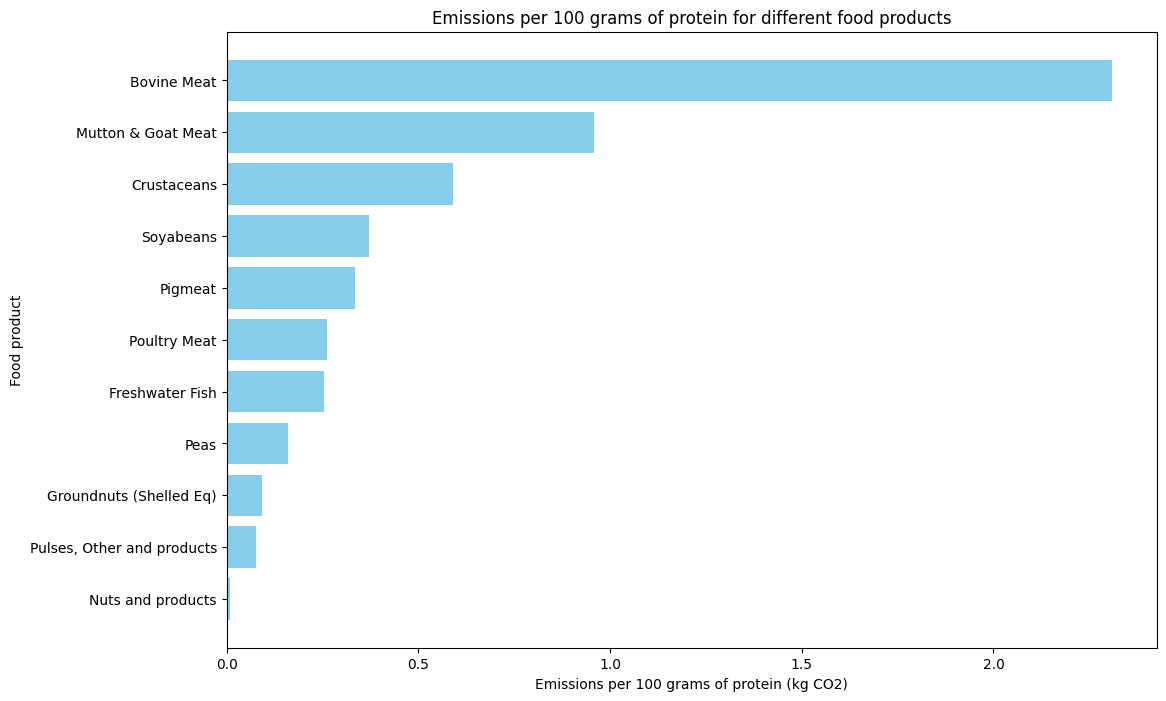

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(protein_emission_df_sorted['Food product'], protein_emission_df_sorted['Emissions per 100g protein'], color='skyblue')
plt.xlabel('Emissions per 100 grams of protein (kg CO2)')
plt.ylabel('Food product')
plt.title('Emissions per 100 grams of protein for different food products')
plt.show()



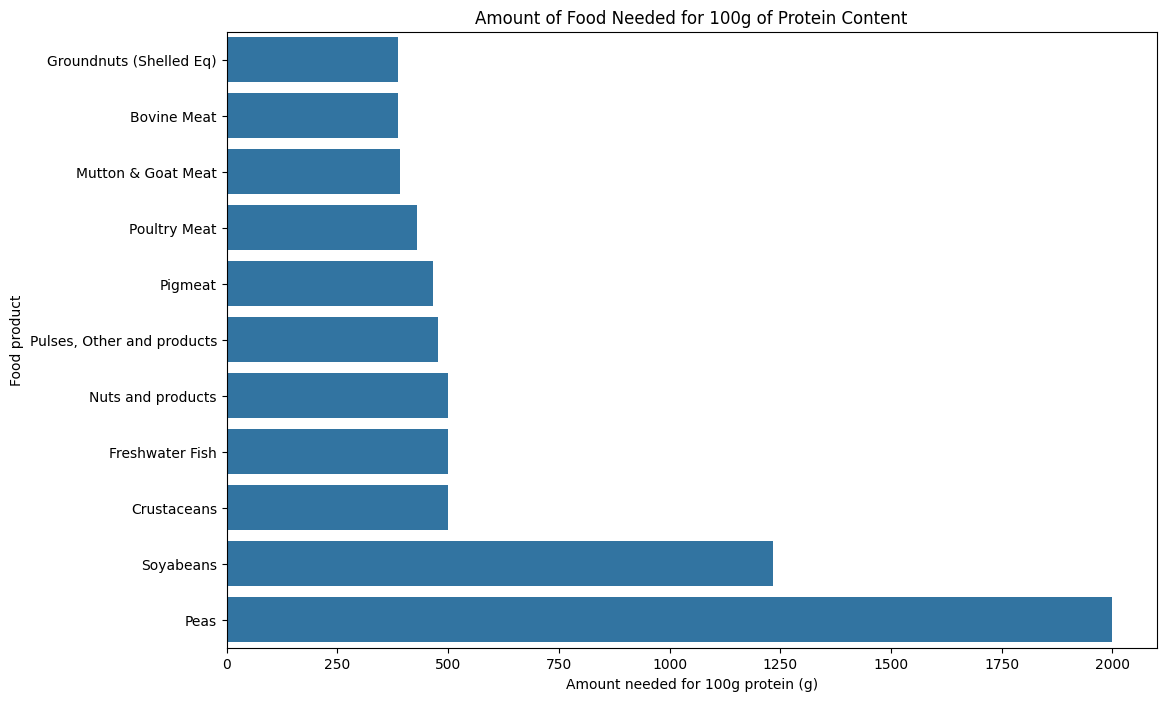

In [ ]:
# Barplot for how much protein is needed for 100g
plt.figure(figsize=(12, 8))

sns.barplot(
    x='Amount needed for 100g protein (g)',
    y='Food product',
    data=protein_needed_df_sorted
)

plt.xlabel('Amount needed for 100g protein (g)')
plt.ylabel('Food product')
plt.title('Amount of Food Needed for 100g of Protein Content')

plt.show()

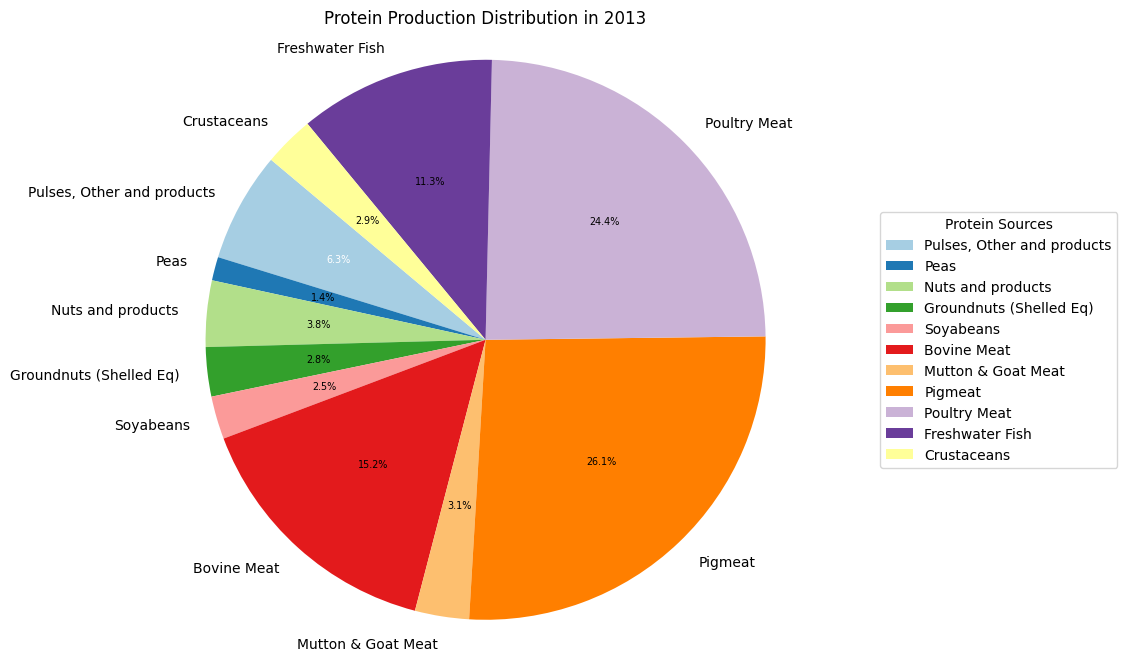

In [ ]:
# All protein
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    protein_2013_df['protein_ratios'], 
    labels=protein_2013_df['Item'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title('Protein Production Distribution in 2013')
plt.axis('equal')


plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.legend(wedges, protein_2013_df['Item'],
           title="Protein Sources",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

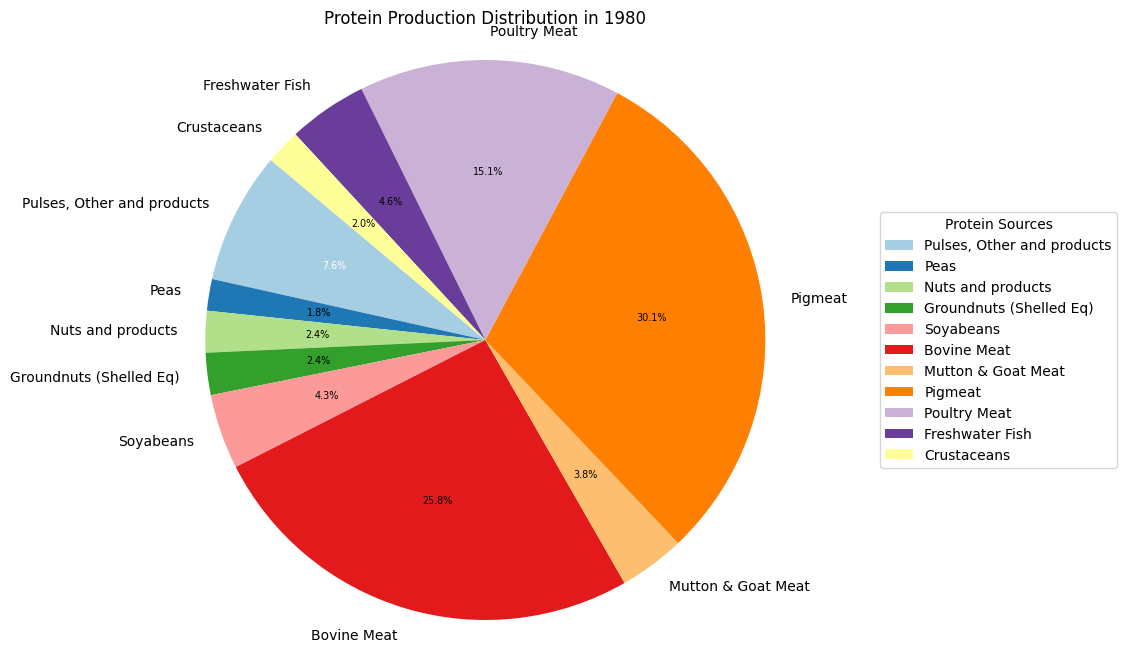

In [ ]:
# All protein
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    protein_1980_df['protein_ratios'], 
    labels=protein_1980_df['Item'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title('Protein Production Distribution in 1980')
plt.axis('equal')


plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.legend(wedges, protein_1980_df['Item'],
           title="Protein Sources",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

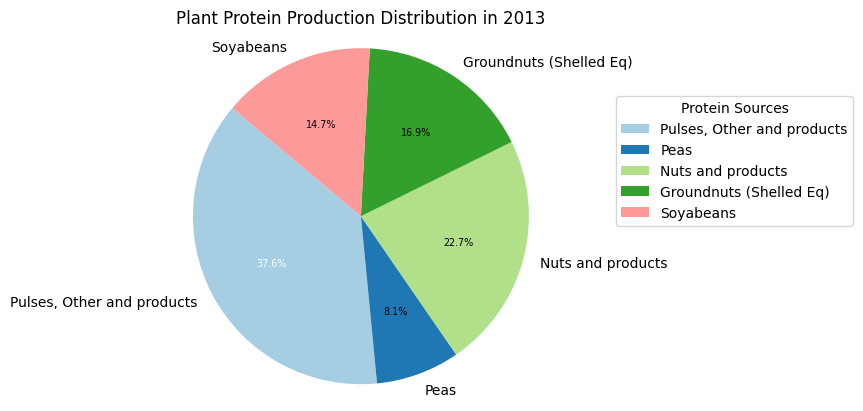

In [ ]:
# Plant protein
wedges, texts, autotexts = plt.pie(
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), 'diet_ratios'],
    labels=protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), 'Item'],
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title('Plant Protein Production Distribution in 2013')
plt.axis('equal')


plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.legend(wedges, protein_2013_df['Item'],
           title="Protein Sources",
           loc="center left",
           bbox_to_anchor=(1, 0.15, 0.5, 1))

plt.show()

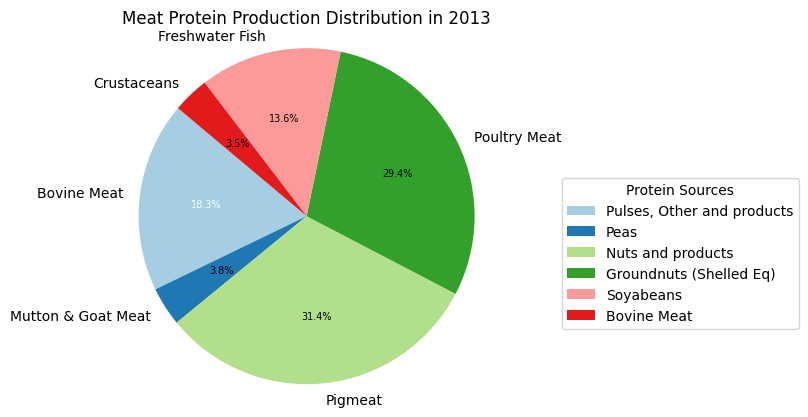

In [ ]:
# Meat protein
wedges, texts, autotexts = plt.pie(
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), 'diet_ratios'],
    labels=protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), 'Item'],
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)

plt.title('Meat Protein Production Distribution in 2013')
plt.axis('equal')


plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.legend(wedges, protein_2013_df['Item'],
           title="Protein Sources",
           loc="center left",
           bbox_to_anchor=(1, -0.1, 0.5, 1))

plt.show()

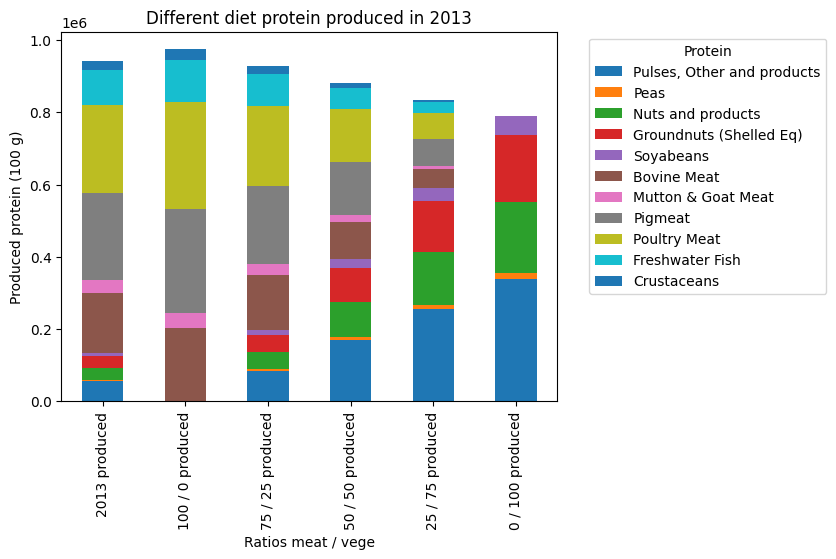

In [ ]:
# Plot different protein produced 100 g
# Plot the data for different ratios of plant / meat
protein_2013_df_T.plot(kind="bar", stacked=True)
plt.xlabel("Ratios meat / vege")
plt.ylabel("Produced protein (100 g)")
plt.title("Different diet protein produced in 2013")
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



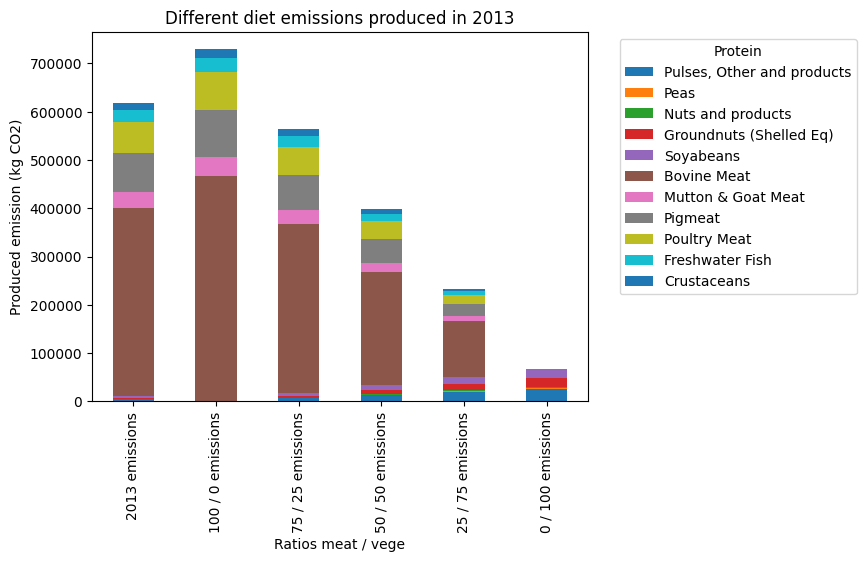

In [ ]:
# Plot different emission per  100 g protein
# Plot the data for different ratios of plant / meat
emission_2013_df_T.plot(kind="bar", stacked=True)
plt.xlabel("Ratios meat / vege")
plt.ylabel("Produced emission (kg CO2)")
plt.title("Different diet emissions produced in 2013")
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
"""
# Overall emissions from the dietary from 100 to 0
values = []

for i in range(0, 101):
    sum_value = ((total_protein_production_2013 * interval[1]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["diet_ratios"] / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Multiplier"]).sum() +
                 (total_protein_production_2013 * interval[0]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["diet_ratios"] / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Multiplier"]).sum())
    values.append(sum_value)

df = pd.DataFrame({'values': values}, index=list(range(100, -1, -1)))

df.plot(kind="line")
plt.xlabel("Ratio of vege / meat")
plt.ylabel("Emissions (kg CO2)")
plt.title("Emissions based on ratio of vege / meat")
plt.show()
"""
    

'\n# Overall emissions from the dietary from 100 to 0\nvalues = []\n\nfor i in range(0, 101):\n    sum_value = ((total_protein_production_2013 * interval[1]/100 * protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[:5])]["diet_ratios"] / protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[:5])]["Multiplier"]).sum() +\n                 (total_protein_production_2013 * interval[0]/100 * protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[5:])]["diet_ratios"] / protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[5:])]["Multiplier"]).sum())\n    values.append(sum_value)\n\ndf = pd.DataFrame({\'values\': values}, index=list(range(100, -1, -1)))\n\ndf.plot(kind="line")\nplt.xlabel("Ratio of vege / meat")\nplt.ylabel("Emissions (kg CO2)")\nplt.title("Emissions based on ratio of vege / meat")\nplt.show()\n'

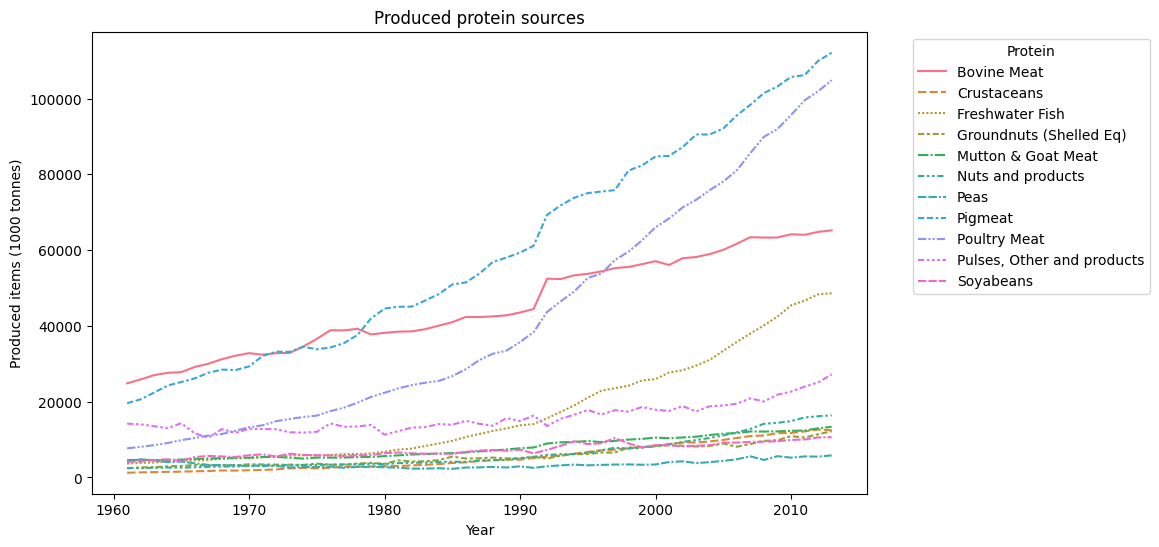

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

'\n Here we can do also line grpah for all protein combined and \n Then continue with like estimating the growth with some model\n and just idk use some like how the emissions would look like\n '

In [ ]:
# How much is produced for food 
world_protein_sum = fao[(fao["Item"].isin(proteins_fao)) & (fao["Element"] == "Food")]
world_protein_sum = world_protein_sum.groupby("Item")[world_protein_sum.columns[10:63]].sum()
world_protein_sum.columns = world_protein_sum.columns.str[1:].astype(int)
world_protein_sum_transposed = world_protein_sum.T

plt.figure(figsize=(10, 6))
sns.lineplot(data=world_protein_sum_transposed)
plt.xlabel("Year")
plt.ylabel("Produced items (1000 tonnes)")
plt.title("Produced protein sources")
plt.legend(title="Protein", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print(food_production.columns)
print(fao.columns)
print(food_production.loc[:5,:])

"""
 Here we can do also line grpah for all protein combined and 
 Then continue with like estimating the growth with some model
 and just idk use some like how the emissions would look like
 """

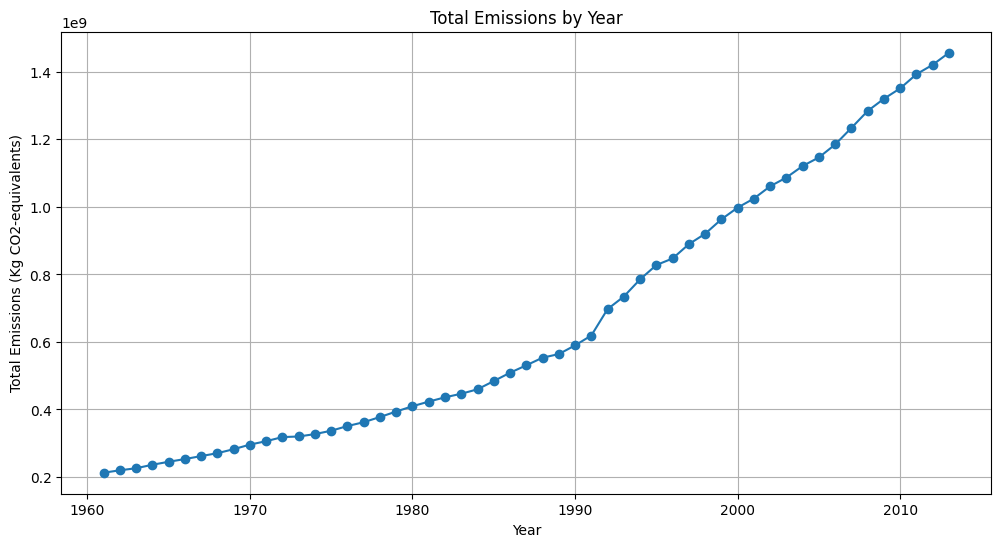

In [ ]:
fao_filtered = fao[fao['Element'] == 'Food']
reshaped_fao = fao_filtered.melt(id_vars=['Area', 'Item', 'Element', 'Unit'], 
                                           value_vars=[col for col in fao_filtered.columns if col.startswith('Y')],
                                           var_name='Year', 
                                           value_name='Production')

# Convert the 'Year' column to integer
reshaped_fao['Year'] = reshaped_fao['Year'].str.extract('(\d+)').astype(int)
merged_data = pd.merge(reshaped_fao, 
                       food_production, 
                       left_on='Item', 
                       right_on='Food product', 
                       how='inner')
merged_data['Total_Emissions'] = merged_data['Production']*1000 * merged_data['Total_emissions']

# Group by year and calculate the total emissions for each year
total_emissions_by_year = merged_data.groupby('Year')['Total_Emissions'].sum().reset_index()

# Print the result
plt.figure(figsize=(12, 6))
plt.plot(total_emissions_by_year['Year'], total_emissions_by_year['Total_Emissions'], marker='o')
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Kg CO2-equivalents)')
plt.grid(True)
plt.show()


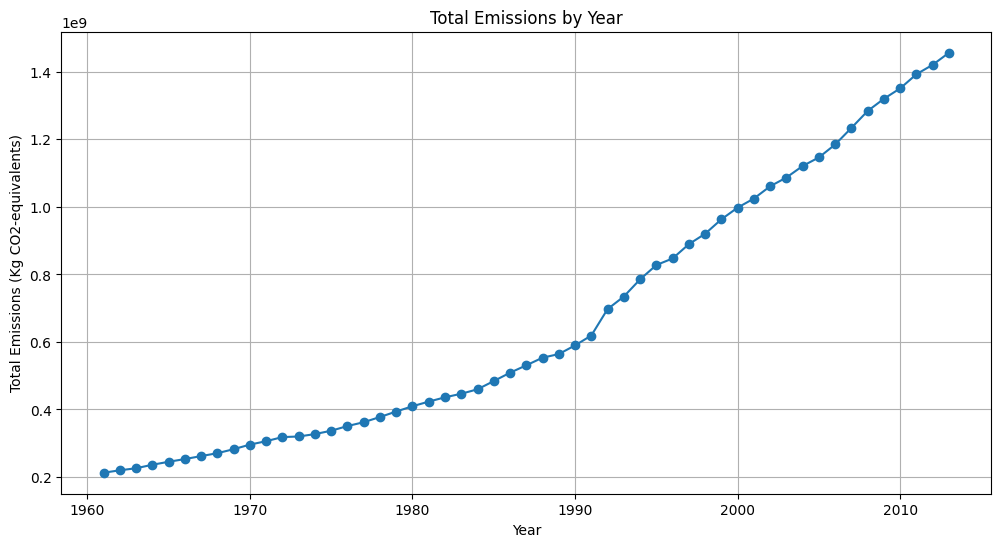

In [ ]:
# Filter the FAO dataset to only include 'Food' production
fao_food = fao[fao['Element'] == 'Food']

# Initialize a dictionary to store total emissions by year
total_emissions_by_year = {}

# Iterate through each year column
for year in range(1961, 2014):
    year_column = f'Y{year}'
    
    # Filter rows with valid production data
    year_production = fao_food[year_column].notna()
    
    # Calculate total emissions for each product
    emissions = fao_food.loc[year_production, year_column].values * 1000*\
                food_production.set_index('Food product')['Total_emissions'].reindex(
                    fao_food.loc[year_production, 'Item'].values).values
    
    # Sum the total emissions for the year
    total_emissions_by_year[year] = np.nansum(emissions)

# Convert the dictionary to a DataFrame for plotting
total_emissions_df = pd.DataFrame(list(total_emissions_by_year.items()), columns=['Year', 'Total_Emissions'])
plt.figure(figsize=(12, 6))
plt.plot(total_emissions_df['Year'], total_emissions_df['Total_Emissions'], marker='o')
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Kg CO2-equivalents)')
plt.grid(True)
plt.show()

In [ ]:
"""
protein_data = fao.melt(id_vars=['Area', 'Item', 'Element', 'Unit'], 
                             var_name='Year', 
                             value_name='Protein_Production')

# Filter for relevant protein data
# Adjust 'Element' and 'Unit' filters based on actual dataset
protein_data = protein_data[(protein_data['Element'] == 'Food') & 
                            (protein_data['Unit'] == '1000 tonnes')]

# Convert 'Year' to integer
protein_data['Year'] = protein_data['Year'].str.extract('(\d+)').astype(float)

# Aggregate by year to get total protein production per year
protein_data = protein_data.groupby('Year')['Protein_Production'].sum().reset_index()

# Handle missing values
protein_data = protein_data.dropna()

# Ensure there are no infinite values
protein_data = protein_data.replace([np.inf, -np.inf], np.nan).dropna()

# Check if there are enough non-NaN rows for Prophet
print(f"Number of non-NaN rows in protein_data: {len(protein_data)}")

# Prepare data for Prophet
protein_data_prophet = protein_data.rename(columns={'Year': 'ds', 'Protein_Production': 'y'})
protein_data_prophet['ds'] = pd.to_datetime(protein_data_prophet['ds'], format='%Y')

# Ensure data is in correct format
print(protein_data_prophet.head())

# Initialize the Prophet model
model = Prophet()

# Fit the model on historical data
model.fit(protein_data_prophet)

# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=10, freq='Y')  # Predicting next 10 years (2014-2023)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Protein Production Forecast')
plt.xlabel('Year')
plt.ylabel('Protein Production')
plt.show()

# Display the forecasted values for the future

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
"""

'\nprotein_data = fao.melt(id_vars=[\'Area\', \'Item\', \'Element\', \'Unit\'], \n                             var_name=\'Year\', \n                             value_name=\'Protein_Production\')\n\n# Filter for relevant protein data\n# Adjust \'Element\' and \'Unit\' filters based on actual dataset\nprotein_data = protein_data[(protein_data[\'Element\'] == \'Food\') & \n                            (protein_data[\'Unit\'] == \'1000 tonnes\')]\n\n# Convert \'Year\' to integer\nprotein_data[\'Year\'] = protein_data[\'Year\'].str.extract(\'(\\d+)\').astype(float)\n\n# Aggregate by year to get total protein production per year\nprotein_data = protein_data.groupby(\'Year\')[\'Protein_Production\'].sum().reset_index()\n\n# Handle missing values\nprotein_data = protein_data.dropna()\n\n# Ensure there are no infinite values\nprotein_data = protein_data.replace([np.inf, -np.inf], np.nan).dropna()\n\n# Check if there are enough non-NaN rows for Prophet\nprint(f"Number of non-NaN rows in protein_

In [ ]:
from sklearn.linear_model import LinearRegression

protein_data = fao.melt(id_vars=['Area', 'Item', 'Element', 'Unit'], 
                             var_name='Year', 
                             value_name='Protein_Production')

# Filter for relevant protein data
# Adjust 'Element' filter based on actual dataset
protein_data = protein_data[(protein_data['Element'] == 'Food') & 
                            (protein_data['Unit'] == '1000 tonnes')]

# Convert 'Year' to integer
protein_data['Year'] = protein_data['Year'].str.extract('(\d+)').astype(float)

# Aggregate by year to get total protein production per year
protein_data = protein_data.groupby('Year')['Protein_Production'].sum().reset_index()

# Handle missing values
protein_data = protein_data.drop for index, row in df.iterrows():
    year = row['Year']
    predicted_protein_production = row['Predicted_Protein_Production']na()

# Ensure there are no infinite values
protein_data = protein_data.replace([np.inf, -np.inf], np.nan).dropna()

# Because Russias data starts from 93 it is a big bump :) 
protein_temp = protein_data[(protein_data['Year'] >= 1993) & (protein_data['Year'] <= 2013)]

# Prepare data for regression
X = protein_temp[['Year']]
y = protein_temp['Protein_Production']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for the future (2014-2023)
future_years = pd.DataFrame({'Year': range(2014, 2024)})
predictions = model.predict(future_years)

# Combine future years and predictions
future_predictions = future_years.copy()
future_predictions['Predicted_Protein_Production'] = predictions

# Plot the historical and predicted values
plt.figure(figsize=(12, 6))
plt.plot(protein_data['Year'], protein_data['Protein_Production'], label='Historical Protein Production', marker='o')
plt.plot(future_predictions['Year'], future_predictions['Predicted_Protein_Production'], label='Predicted Protein Production', marker='x')
plt.xlabel('Year')
plt.ylabel('Protein Production')
plt.title('Historical and Predicted Protein Production')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values for the future
print(future_predictions)

SyntaxError: invalid syntax (2637988259.py, line 19)

In [ ]:
print(list(future_predictions["Predicted_Protein_Production"]))
for index, row in df.iterrows():
    year = row['Year']
    predicted_protein_production = row['Predicted_Protein_Production']
    # Extract total production of 2013 protein items
    protein_2013_df = fao[(fao["Item"].isin(proteins_fao)) & (fao["Element"] == "Food")].groupby('Item')['Y2013'].sum().reset_index()

    protein_2013_df['Item'] = pd.Categorical(protein_2013_df['Item'], categories=proteins_fao, ordered=True)

    # Calculate total production of proteins in 2013, meat and plant 
    total_protein_production_2013 = protein_2013_df['Y2013'].sum()
    total_meat_production_2013 = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]['Y2013'].sum()
    total_plant_production_2013 = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]['Y2013'].sum()


    # Calculate ratios of how much of each protein is in 2013
    plant_ratios = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]['Y2013'] / total_plant_production_2013 * 100
    meat_ratios = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]['Y2013'] / total_meat_production_2013 * 100
    protein_ratios = (protein_2013_df['Y2013'] / total_protein_production_2013) * 100


    # Add ratios to dataframe
    protein_2013_df["protein_ratios"] = protein_ratios
    protein_2013_df["diet_ratios"] = pd.NA
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), 'diet_ratios'] = plant_ratios.values
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), 'diet_ratios'] = meat_ratios.values

    # Sort dataframe to vege to meat
    protein_2013_df = protein_2013_df.sort_values('Item').reset_index(drop=True)

    # Merge with emissions
    protein_2013_df = pd.merge(protein_2013_df, protein_emission_df, left_on="Item", right_on="Food product")
    protein_2013_df = protein_2013_df.drop(columns=["Food product"])

    # Calculate 2013 ratios for protein produced 100g 
    protein_2013_df["2013 produced"] = protein_2013_df["Y2013"] * 1000 / protein_2013_df["Amount needed for 100g protein (g)"]

    # Define the intervals
    intervals = [[100, 0], [75, 25], [50, 50], [25, 75], [0, 100]]

    # Create a new column for each interval
    for interval in intervals:
        # Initiate new column
        protein_2013_df[f"{interval[0]} / {interval[1]} produced"] = pd.NA

        # Calculate the ratios
        plant_amount = total_protein_production_2013 * 1000 * interval[1]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["diet_ratios"] / 100 / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Amount needed for 100g protein (g)"]
        meat_amount = total_protein_production_2013 *1000 * interval[0]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["diet_ratios"] / 100 / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Amount needed for 100g protein (g)"]

        # Put the values in the dataframe
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), f"{interval[0]} / {interval[1]} produced"] = plant_amount.values
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), f"{interval[0]} / {interval[1]} produced"] = meat_amount.values



    # Calculate 2013 ratios for emission produced 100g of protein
    protein_2013_df["2013 emissions"] = protein_2013_df["2013 produced"] * protein_2013_df["Emissions per 100g protein"]

    # Create a new column for each interval
    for interval in intervals:
        # Initiate new column
        protein_2013_df[f"{interval[0]} / {interval[1]} emissions"] = pd.NA

        # Calculate the ratios
        plant_amount = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])][f"{interval[0]} / {interval[1]} produced"] * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Emissions per 100g protein"]
        meat_amount = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])][f"{interval[0]} / {interval[1]} produced"] * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Emissions per 100g protein"]

        # Put the values in the dataframe
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), f"{interval[0]} / {interval[1]} emissions"] = plant_amount.values
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), f"{interval[0]} / {interval[1]} emissions"] = meat_amount.values

    print(protein_2013_df["50 / 50 emissions"].sum())
    # Set item as index to draw the plots
    protein_2013_df_interval = protein_2013_df.set_index("Item")

    # Transpose protein produced
    protein_2013_df_T = protein_2013_df_interval[protein_2013_df_interval.columns[5:11]].T

[9882825.519047618, 10062959.003463209, 10243092.48787874, 10423225.97229433, 10603359.456709921, 10783492.941125512, 10963626.425541103, 11143759.909956694, 11323893.394372284, 11504026.878787875]
397690.19988087384


       Year  Production   Year^2      Year^3                        Item
0      1961        15.0  3845521  7541066681  Pulses, Other and products
1      1961         0.0  3845521  7541066681  Pulses, Other and products
2      1961        23.0  3845521  7541066681  Pulses, Other and products
3      1961         0.0  3845521  7541066681  Pulses, Other and products
4      1961        12.0  3845521  7541066681  Pulses, Other and products
...     ...         ...      ...         ...                         ...
89013  2013        16.0  4052169  8157016197                 Crustaceans
89014  2013       259.0  4052169  8157016197                 Crustaceans
89015  2013         1.0  4052169  8157016197                 Crustaceans
89016  2013         0.0  4052169  8157016197                 Crustaceans
89017  2013         0.0  4052169  8157016197                 Crustaceans

[89018 rows x 5 columns]
     Year                        Item    Production
0    2014  Pulses, Other and products  14966.3

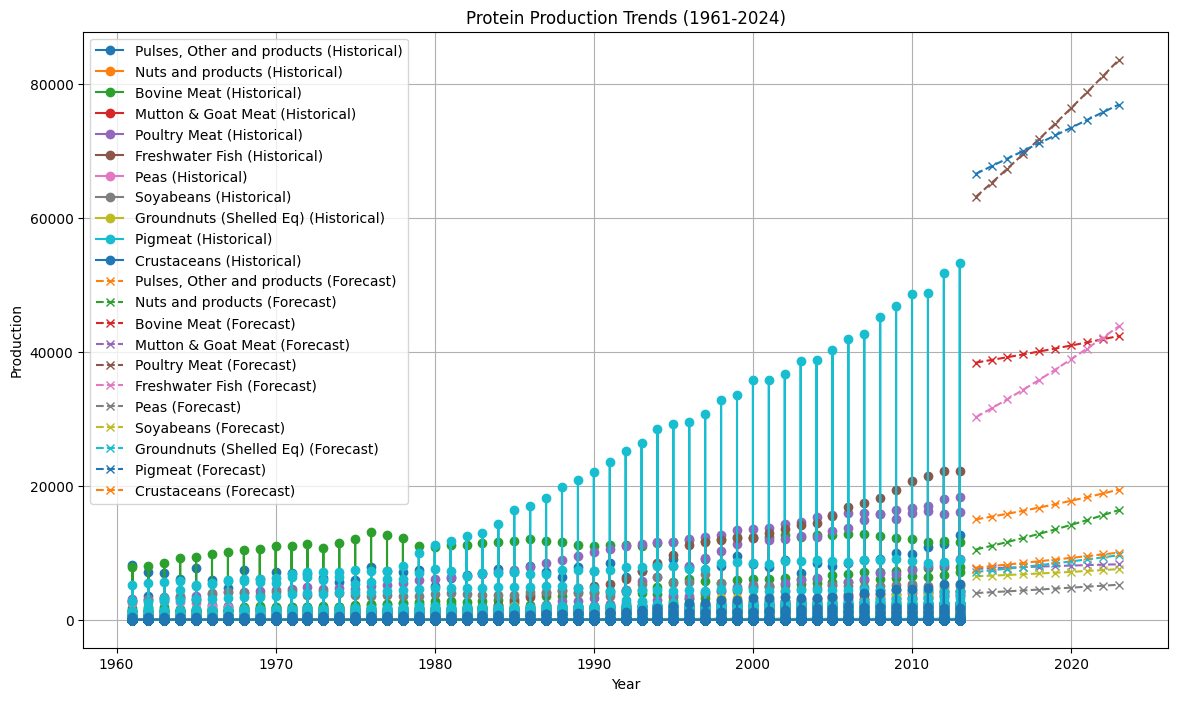

In [ ]:
from sklearn.linear_model import LinearRegression

year_columns = [col for col in fao.columns if col.startswith('Y')]
fao_data_filtered = fao[['Area', 'Item', 'Element', 'Unit'] + year_columns]

# Filter for protein-related elements
protein_data = fao_data_filtered[(fao_data_filtered["Item"].isin(proteins_fao)) & (fao["Element"] == "Food")]
#protein_data_meat = fao_data_filtered[(fao_data_filtered["Item"].isin(proteins_fao[5:])) & (fao["Element"] == "Food")]
#protein_data_plant = fao_data_filtered[(fao_data_filtered["Item"].isin(proteins_fao[:5])) & (fao["Element"] == "Food")]

# Melt the data to have year and production in rows
protein_data_melted = protein_data.melt(id_vars=['Area', 'Item', 'Element', 'Unit'], 
                                        value_vars=year_columns, 
                                        var_name='Year', 
                                        value_name='Production')

# Convert Year to numeric and drop NaNs
protein_data_melted['Year'] = protein_data_melted['Year'].str.extract('(\d+)').astype(int)
protein_data_melted = protein_data_melted.dropna(subset=['Production'])

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def prepare_regression_data(protein_data, item):
    df = protein_data[protein_data['Item'] == item][['Year', 'Production']].copy()
    df['Year^2'] = df['Year'] ** 2
    df['Year^3'] = df['Year'] ** 3
    df['Item'] = item 
    return df

# Train a regression model for each protein source
protein_sources = protein_data_melted['Item'].unique()
forecast_results = {}
historical_results = {}

for item in protein_sources:
    df = prepare_regression_data(protein_data_melted, item)
    
    if df.empty:
        print(f"No data available for {item}")
        continue
    
    # Train linear regression model
    X_train = df[['Year', 'Year^2', 'Year^3']]
    y_train = df['Production']
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Forecast for 2014-2023
    future_years = np.arange(2014, 2024).reshape(-1, 1)
    future_years = pd.DataFrame({'Year': np.arange(2014, 2024)})
    future_years['Year^2'] = future_years['Year'] ** 2
    future_years['Year^3'] = future_years['Year'] ** 3
    forecast = model.predict(future_years)
    
    forecast_results[item] = pd.DataFrame({
        'Year': future_years["Year"],
        'Item': item,
        'Production': forecast
    })
    
    historical_results[item] = df

# Combine all forecasts into a single DataFrame
if forecast_results:
    forecast_df = pd.concat(forecast_results.values(), axis=0).reset_index(drop=True)
else:
    forecast_df = pd.DataFrame()

forecast_df['Production'] = forecast_df['Production']*(100)
# Combine all historical data into a single DataFrame
if historical_results:
    historical_df = pd.concat(historical_results.values(), axis=0).reset_index(drop=True)
else:
    historical_df = pd.DataFrame()
plt.figure(figsize=(14, 8))

print(historical_df)
print(forecast_df)
# Plot historical data
for item in protein_sources:
    item_historical = historical_df[historical_df['Item'] == item]
    if not item_historical.empty:
        plt.plot(item_historical['Year'], item_historical['Production'], marker='o', label=f'{item} (Historical)')

# Plot forecasted data
for item in protein_sources:
    item_forecast = forecast_df[forecast_df['Item'] == item]
    if not item_forecast.empty:
        plt.plot(item_forecast['Year'], item_forecast['Production'], marker='x', linestyle='--', label=f'{item} (Forecast)')
#
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Protein Production Trends (1961-2024)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def prepare_regression_data(protein_data, item):
    df = protein_data[protein_data['Item'] == item][['Year', 'Production']].copy()
    df['Year^2'] = df['Year'] ** 2
    df['Year^3'] = df['Year'] ** 3
    return df

# Train a regression model for each protein source
protein_sources = protein_data_melted['Item'].unique()
forecast_results = []
historical_results = []

for item in protein_sources:
    df = prepare_regression_data(protein_data_melted, item)
    
    if df.empty:
        print(f"No data available for {item}")
        continue
    
    # Train linear regression model
    X_train = df[['Year', 'Year^2', 'Year^3']]
    y_train = df['Production']
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Forecast for 2014-2023
    future_years = pd.DataFrame({'Year': np.arange(2014, 2024)})
    future_years['Year^2'] = future_years['Year'] ** 2
    future_years['Year^3'] = future_years['Year'] ** 3
    forecast = model.predict(future_years)
    
    forecast_df = pd.DataFrame({
        'Year': future_years['Year'],
        'Item': item,
        'Production': forecast
    })
    forecast_results.append(forecast_df)
    
    historical_results.append(df)

# Combine all forecasts into a single DataFrame
if forecast_results:
    forecast_df = pd.concat(forecast_results, axis=0).reset_index(drop=True)
else:
    forecast_df = pd.DataFrame()

# Combine all historical data into a single DataFrame
if historical_results:
    historical_df = pd.concat(historical_results, axis=0).reset_index(drop=True)
else:
    historical_df = pd.DataFrame()

# Plot the results
plt.figure(figsize=(14, 8))

# Plot historical data
for item in protein_sources:
    item_historical = historical_df[historical_df['Item'] == item]
    if not item_historical.empty:
        plt.plot(item_historical['Year'], item_historical['Production'], marker='o', label=f'{item} (Historical)')

# Plot forecasted data
for item in protein_sources:
    item_forecast = forecast_df[forecast_df['Item'] == item]
    if not item_forecast.empty:
        plt.plot(item_forecast['Year'], item_forecast['Production'], marker='x', linestyle='--', label=f'{item} (Forecast)')

plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Protein Production Trends (1961-2023)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

KeyError: 'Item'

<Figure size 1400x800 with 0 Axes>

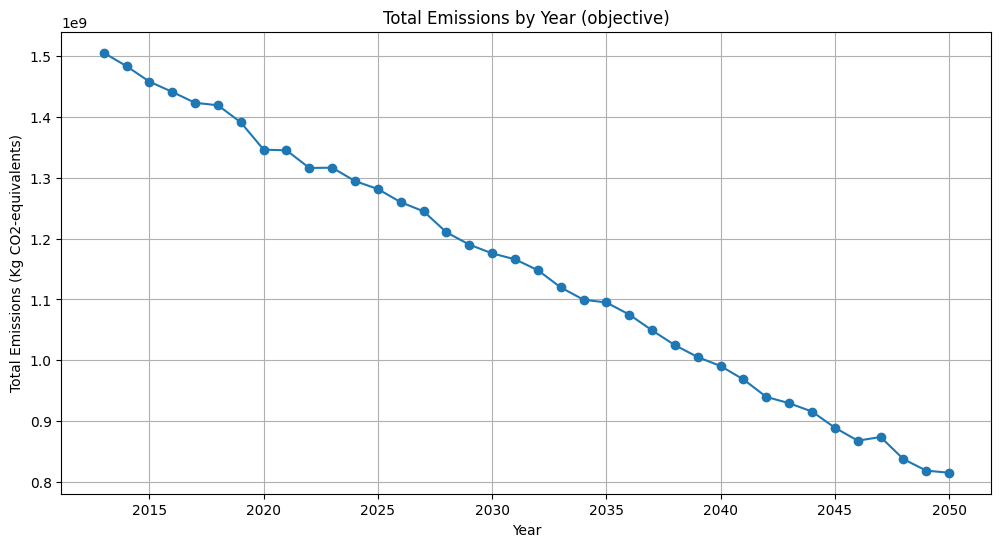

In [ ]:
# Define the years range from 2013 to 2050
years = np.arange(2013, 2051)

# Generate linearly spaced emissions values from 1.5e9 to 0.8e9
emissions = np.linspace(1.5e9, 0.8e9, len(years))

# Add some random noise to the emissions to introduce small variations
noise = np.random.normal(0, 1e7, len(years))
emissions_with_noise = emissions + noise

# Create a DataFrame
df = pd.DataFrame({
    'Year': years,
    'Total_Emissions': emissions_with_noise
})

# Ensure the total emissions values are within the desired range

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total_Emissions'], marker='o')
plt.title('Total Emissions by Year (objective)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Kg CO2-equivalents)')
plt.grid(True)
plt.show()

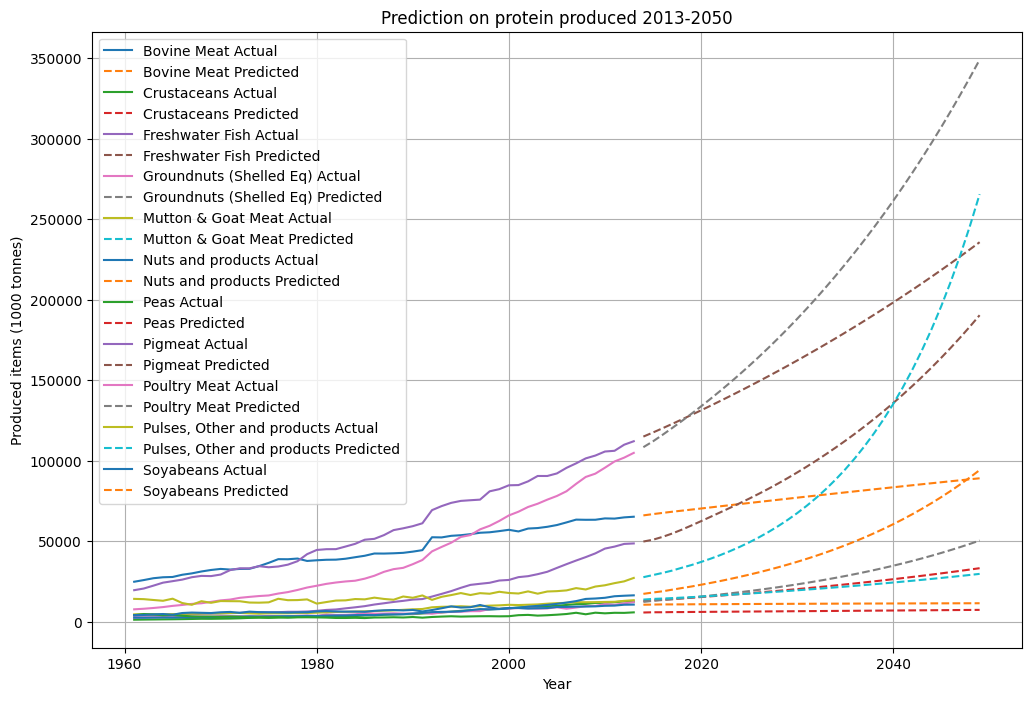

In [ ]:
# https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html
# And chat

import pandas as pd
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# List of items to predict
items_to_predict = world_protein_sum_transposed.columns

temp = world_protein_sum_transposed.copy()
temp.index = pd.to_datetime(temp.index, format='%Y')
temp = temp.asfreq('YS')

# Initialize dictionary to store predictions
predictions = {}

# Loop over each item
for item in items_to_predict:

    production = temp[item]
    
    # Train the model
    forecaster = ForecasterAutoreg(regressor=LinearRegression(), lags=5)
    forecaster.fit(production)
    
    # Predict future
    future_years = [year for year in range(2014, 2050)]
    future_predictions = forecaster.predict(steps=len(future_years), last_window=production[-5:])
    
    # Put values in dictionary
    predictions[item] = future_predictions

plt.figure(figsize=(12, 8))

for item, item_predictions in predictions.items():
    all_years = list(world_protein_sum_transposed.index) + future_years
    all_production = list(world_protein_sum_transposed[item]) + list(item_predictions)
    
    plt.plot(world_protein_sum_transposed.index, world_protein_sum_transposed[item], label=f'{item} Actual', linestyle='-')
    plt.plot(future_years, list(item_predictions), label=f'{item} Predicted', linestyle='--')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Produced items (1000 tonnes)')
plt.title('Prediction on protein produced 2013-2050')
plt.grid(True)
plt.show()


In [ ]:
predictions_df = pd.DataFrame(predictions)
predictions_df.index = pd.to_datetime(predictions_df.index).year


# Concatenate the original DataFrame with the predictions DataFrame
combined_df = pd.concat([world_protein_sum_transposed, predictions_df])

combined_df = combined_df.T
print(combined_df)


"""
for year in combined_df.columns:
    protein_2013_df['Item'] = pd.Categorical(protein_2013_df['Item'], categories=proteins_fao, ordered=True)

    # Calculate total production of proteins in 2013, meat and plant 
    total_protein_production_2013 = protein_2013_df[year].sum()
    total_meat_production_2013 = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]['Y2013'].sum()
    total_plant_production_2013 = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]['Y2013'].sum()


    # Calculate ratios of how much of each protein is in 2013
    plant_ratios = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]['Y2013'] / total_plant_production_2013 * 100
    meat_ratios = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]['Y2013'] / total_meat_production_2013 * 100
    protein_ratios = (protein_2013_df['Y2013'] / total_protein_production_2013) * 100


    # Add ratios to dataframe
    protein_2013_df["protein_ratios"] = protein_ratios
    protein_2013_df["diet_ratios"] = pd.NA
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), 'diet_ratios'] = plant_ratios.values
    protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), 'diet_ratios'] = meat_ratios.values

    # Sort dataframe to vege to meat
    protein_2013_df = protein_2013_df.sort_values('Item').reset_index(drop=True)

    # Merge with emissions
    protein_2013_df = pd.merge(protein_2013_df, protein_emission_df, left_on="Item", right_on="Food product")
    protein_2013_df = protein_2013_df.drop(columns=["Food product"])

    # Calculate 2013 ratios for protein produced 100g 
    protein_2013_df["2013 produced"] = protein_2013_df["Y2013"] * 1000 / protein_2013_df["Amount needed for 100g protein (g)"]

    # Define the intervals
    intervals = [[100, 0], [75, 25], [50, 50], [25, 75], [0, 100]]

    # Create a new column for each interval
    for interval in intervals:
        # Initiate new column
        protein_2013_df[f"{interval[0]} / {interval[1]} produced"] = pd.NA

        # Calculate the ratios
        plant_amount = total_protein_production_2013 * 1000 * interval[1]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["diet_ratios"] / 100 / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Amount needed for 100g protein (g)"]
        meat_amount = total_protein_production_2013 *1000 * interval[0]/100 * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["diet_ratios"] / 100 / protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Amount needed for 100g protein (g)"]

        # Put the values in the dataframe
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), f"{interval[0]} / {interval[1]} produced"] = plant_amount.values
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), f"{interval[0]} / {interval[1]} produced"] = meat_amount.values



    # Calculate 2013 ratios for emission produced 100g of protein
    protein_2013_df["2013 emissions"] = protein_2013_df["2013 produced"] * protein_2013_df["Emissions per 100g protein"]

    # Create a new column for each interval
    for interval in intervals:
        # Initiate new column
        protein_2013_df[f"{interval[0]} / {interval[1]} emissions"] = pd.NA

        # Calculate the ratios
        plant_amount = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])][f"{interval[0]} / {interval[1]} produced"] * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[:5])]["Emissions per 100g protein"]
        meat_amount = protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])][f"{interval[0]} / {interval[1]} produced"] * protein_2013_df[protein_2013_df['Item'].isin(proteins_fao[5:])]["Emissions per 100g protein"]

        # Put the values in the dataframe
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[:5]), f"{interval[0]} / {interval[1]} emissions"] = plant_amount.values
        protein_2013_df.loc[protein_2013_df['Item'].isin(proteins_fao[5:]), f"{interval[0]} / {interval[1]} emissions"] = meat_amount.values

"""


                               1961     1962     1963     1964     1965  \
Bovine Meat                 24844.0  25883.0  27027.0  27622.0  27805.0   
Crustaceans                  1256.0   1348.0   1416.0   1483.0   1542.0   
Freshwater Fish              3675.0   3843.0   3955.0   4163.0   4407.0   
Groundnuts (Shelled Eq)      2401.0   2656.0   2714.0   2938.0   3052.0   
Mutton & Goat Meat           4594.0   4630.0   4606.0   4656.0   4715.0   
Nuts and products            2512.0   2483.0   2566.0   2621.0   2592.0   
Peas                         4132.0   4791.0   4517.0   4054.0   4205.0   
Pigmeat                     19599.0  20633.0  22413.0  24269.0  25203.0   
Poultry Meat                 7710.0   8069.0   8544.0   9106.0   9852.0   
Pulses, Other and products  14203.0  14032.0  13511.0  13016.0  14322.0   
Soyabeans                    4145.0   4223.0   4556.0   4797.0   4323.0   

                               1966     1967     1968     1969     1970  ...  \
Bovine Meat        

'\nfor year in combined_df.columns:\n    protein_2013_df[\'Item\'] = pd.Categorical(protein_2013_df[\'Item\'], categories=proteins_fao, ordered=True)\n\n    # Calculate total production of proteins in 2013, meat and plant \n    total_protein_production_2013 = protein_2013_df[year].sum()\n    total_meat_production_2013 = protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[5:])][\'Y2013\'].sum()\n    total_plant_production_2013 = protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[:5])][\'Y2013\'].sum()\n\n\n    # Calculate ratios of how much of each protein is in 2013\n    plant_ratios = protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[:5])][\'Y2013\'] / total_plant_production_2013 * 100\n    meat_ratios = protein_2013_df[protein_2013_df[\'Item\'].isin(proteins_fao[5:])][\'Y2013\'] / total_meat_production_2013 * 100\n    protein_ratios = (protein_2013_df[\'Y2013\'] / total_protein_production_2013) * 100\n\n\n    # Add ratios to dataframe\n    protein_2013_df["

   Land use change  Animal Feed       Farm  Processing  Transport  Packging  \
0         9.000000     0.000000   7.050000    0.400000   0.100000  1.000000   
1         0.900000     2.500000  15.700000    1.100000   0.400000  0.300000   
2         0.491667     0.166667   0.991667    0.179167   0.212500  0.270833   
3         8.400000     2.150000  29.450000    1.200000   0.400000  0.250000   
4         0.478571     0.621429   2.621429    0.164286   0.135714  0.164286   

     Retail  Total_emissions  \
0  0.050000        17.600000   
1  0.200000        21.100000   
2  0.012500         2.325000   
3  0.200000        42.050000   
4  0.142857         4.328571   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                         107.100235          
1                                         133.805861          
2                                          11.215230          
3                                          70.523486          
4                

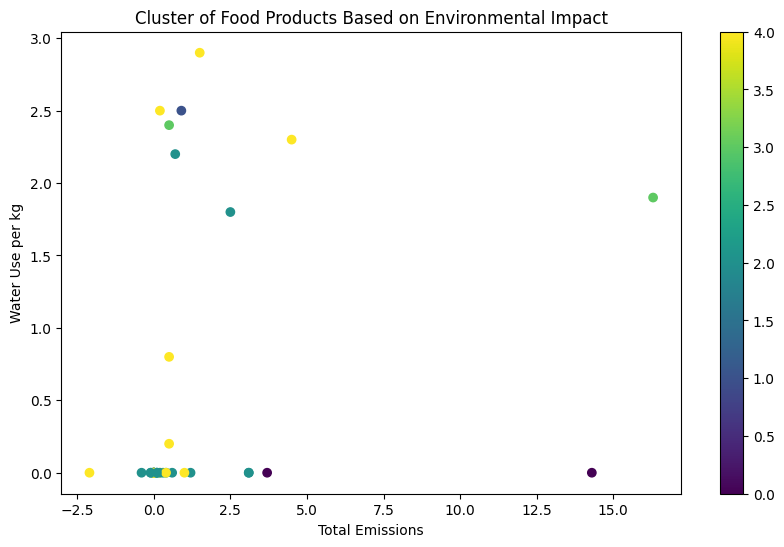

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(food_production.select_dtypes(include=[np.number])), columns=food_production.select_dtypes(include=[np.number]).columns)

# Normalizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
food_production['Cluster'] = clusters

# Analyze Cluster Centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_imputed.columns)
print(cluster_centers)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_imputed.iloc[:, 0], df_imputed.iloc[:, 1], c=food_production['Cluster'], cmap='viridis', marker='o')
plt.colorbar()
plt.xlabel('Total Emissions')
plt.ylabel('Water Use per kg')
plt.title('Cluster of Food Products Based on Environmental Impact')
plt.show()

In [ ]:
pip install ace_tools

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:

#total emissions per food catagory 
#kaggle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from csv file
fao = pd.read_csv("FAO.csv", encoding='latin1')
food_production = pd.read_csv("Food_Production.csv")

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Aggregate emissions by category
category_emissions = food_production_data.groupby('Category')['Total_emissions'].sum().reset_index()

# Sort values for better visualization
category_emissions = category_emissions.sort_values(by='Total_emissions', ascending=False)

# Plot total emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_emissions, x='Total_emissions', y='Category', palette='viridis')
plt.title('Total Emissions per Food Category')
plt.xlabel('Total Emissions (kg CO2 eq)')
plt.ylabel('Food Category')
plt.show()


NameError: name 'food_production_data' is not defined

/tmp/ipykernel_227/3451176703.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')


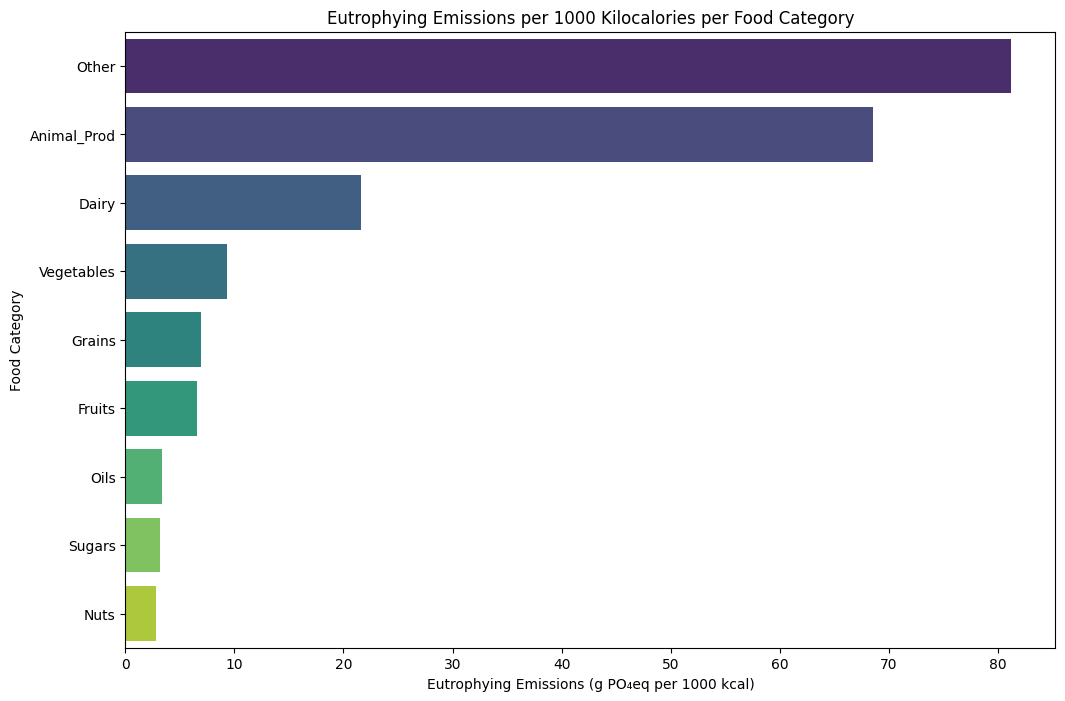

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#kaggle
# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for eutrophying emissions per 1000 kcal
correct_column_name = 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per 1000 Kilocalories per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per 1000 kcal)')
plt.ylabel('Food Category')
plt.show()




/tmp/ipykernel_227/3713491608.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')


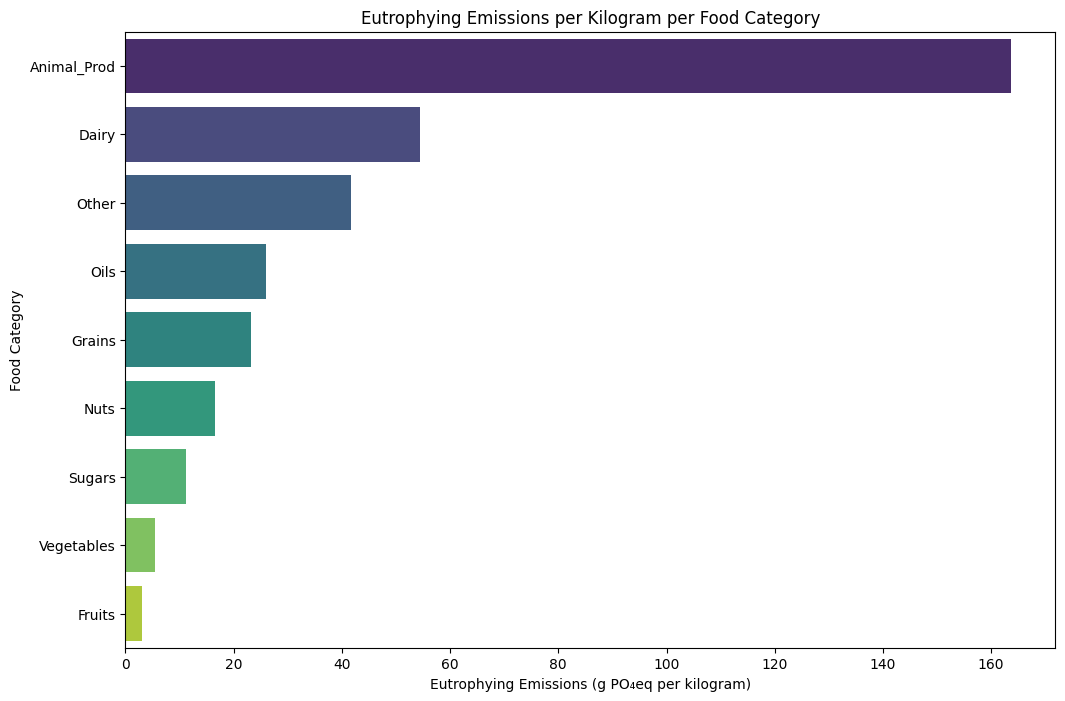

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for eutrophying emissions per kilogram
correct_column_name = 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per Kilogram per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per kilogram)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/1466617927.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')


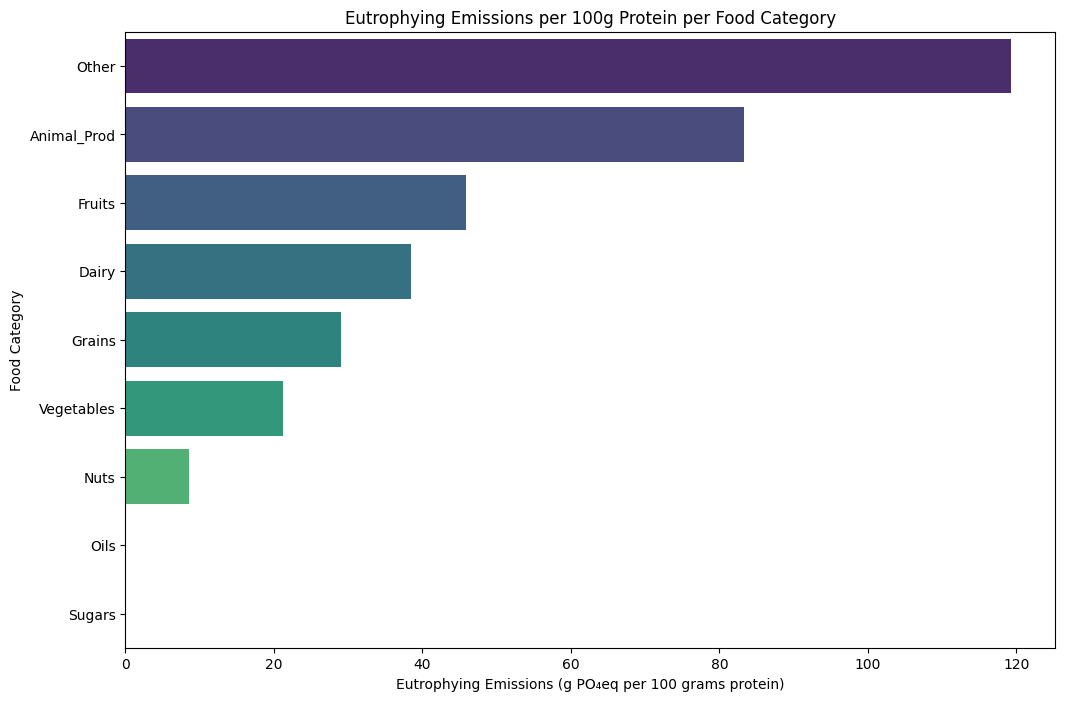

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for eutrophying emissions per 100g protein
correct_column_name = 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)'

# Aggregate eutrophying emissions by category
category_eutrophying_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_eutrophying_emissions = category_eutrophying_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot eutrophying emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_eutrophying_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Eutrophying Emissions per 100g Protein per Food Category')
plt.xlabel('Eutrophying Emissions (g PO₄eq per 100 grams protein)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/637815971.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')


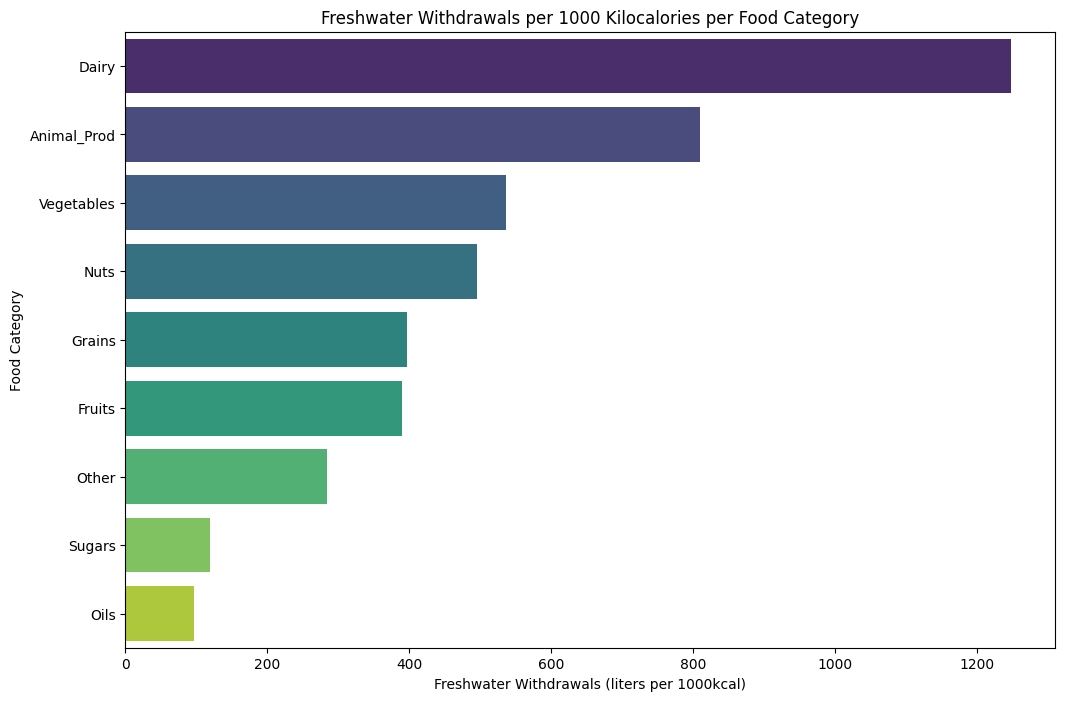

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for freshwater withdrawals per 1000 kcal
correct_column_name = 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)'

# Aggregate freshwater withdrawals by category
category_freshwater_withdrawals = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_freshwater_withdrawals = category_freshwater_withdrawals.sort_values(by=correct_column_name, ascending=False)

# Plot freshwater withdrawals per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')
plt.title('Freshwater Withdrawals per 1000 Kilocalories per Food Category')
plt.xlabel('Freshwater Withdrawals (liters per 1000kcal)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/3065912559.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')


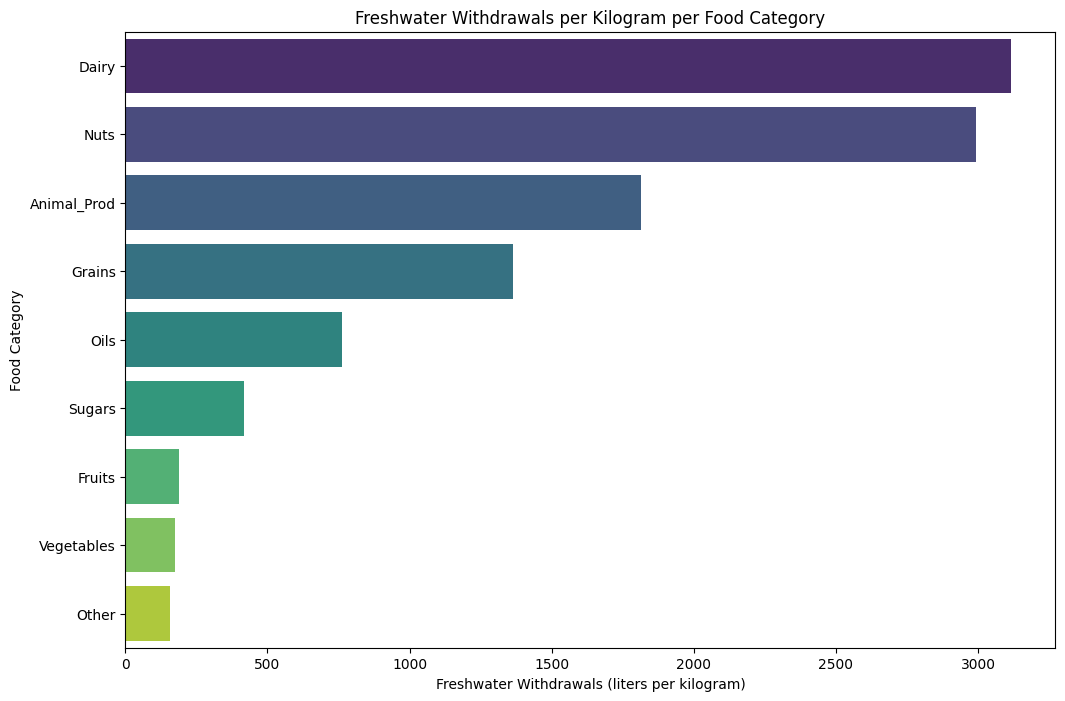

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for freshwater withdrawals per kilogram
correct_column_name = 'Freshwater withdrawals per kilogram (liters per kilogram)'

# Aggregate freshwater withdrawals by category
category_freshwater_withdrawals = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_freshwater_withdrawals = category_freshwater_withdrawals.sort_values(by=correct_column_name, ascending=False)

# Plot freshwater withdrawals per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')
plt.title('Freshwater Withdrawals per Kilogram per Food Category')
plt.xlabel('Freshwater Withdrawals (liters per kilogram)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/1153584318.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')


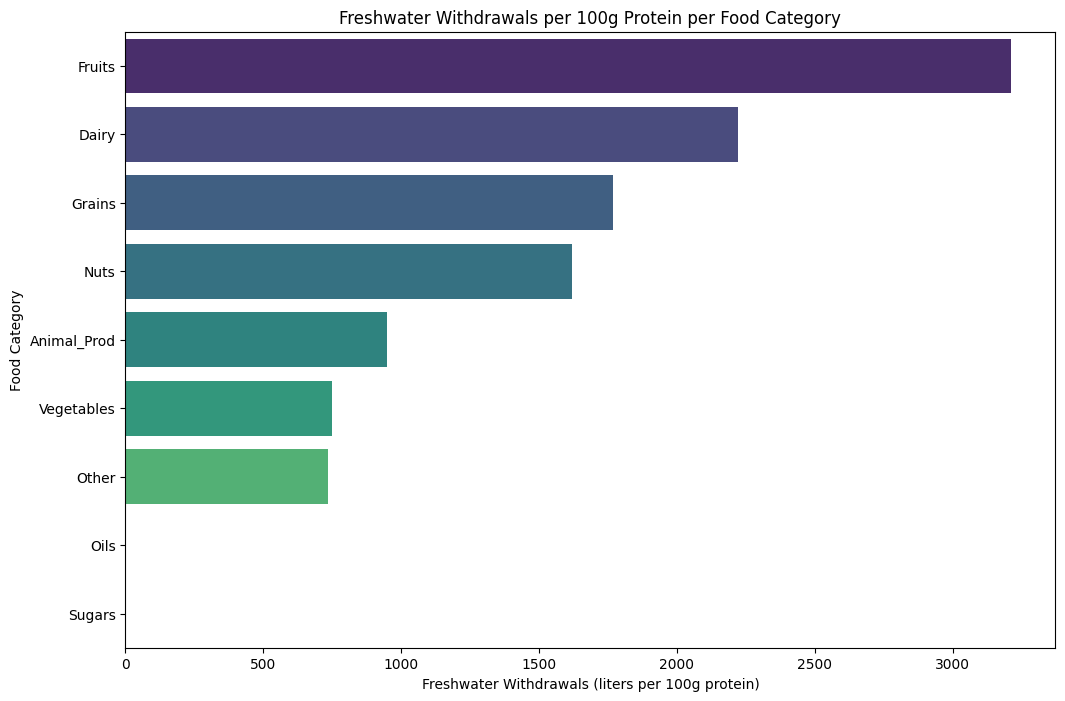

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for freshwater withdrawals per 100g protein
correct_column_name = 'Freshwater withdrawals per 100g protein (liters per 100g protein)'

# Aggregate freshwater withdrawals by category
category_freshwater_withdrawals = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_freshwater_withdrawals = category_freshwater_withdrawals.sort_values(by=correct_column_name, ascending=False)

# Plot freshwater withdrawals per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_freshwater_withdrawals, x=correct_column_name, y='Category', palette='viridis')
plt.title('Freshwater Withdrawals per 100g Protein per Food Category')
plt.xlabel('Freshwater Withdrawals (liters per 100g protein)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/3625571662.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_ghg_emissions, x=correct_column_name, y='Category', palette='viridis')


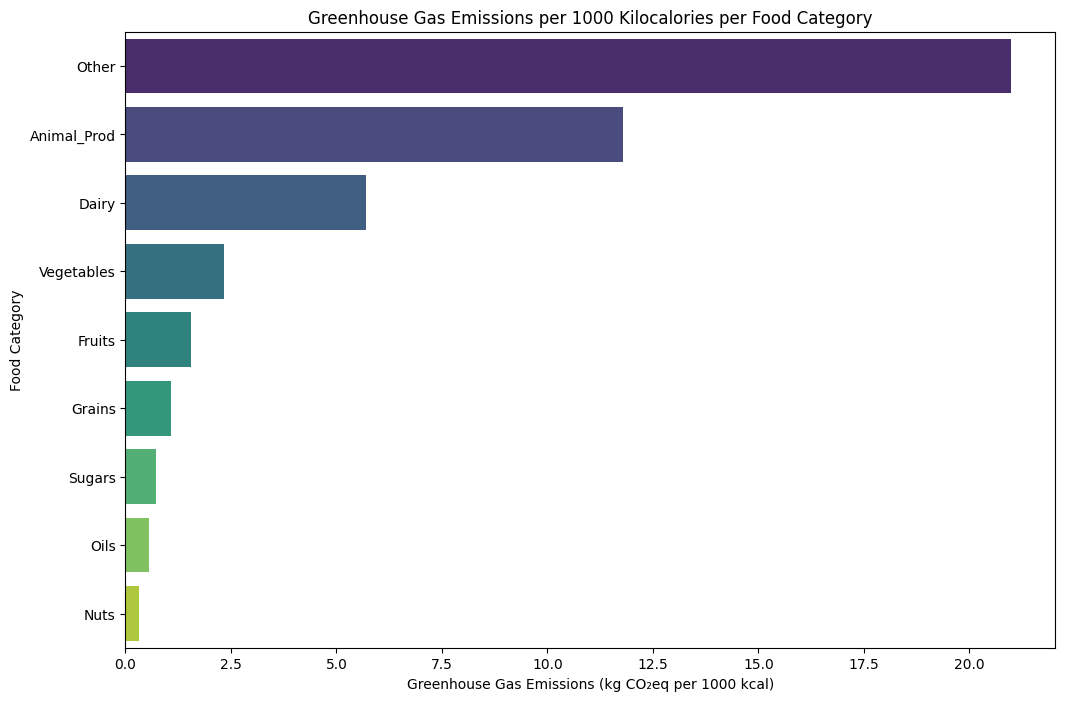

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for greenhouse gas emissions per 1000 kcal
correct_column_name = 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'

# Aggregate greenhouse gas emissions by category
category_ghg_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_ghg_emissions = category_ghg_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot greenhouse gas emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_ghg_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Greenhouse Gas Emissions per 1000 Kilocalories per Food Category')
plt.xlabel('Greenhouse Gas Emissions (kg CO₂eq per 1000 kcal)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/1044918865.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_ghg_emissions, x=correct_column_name, y='Category', palette='viridis')


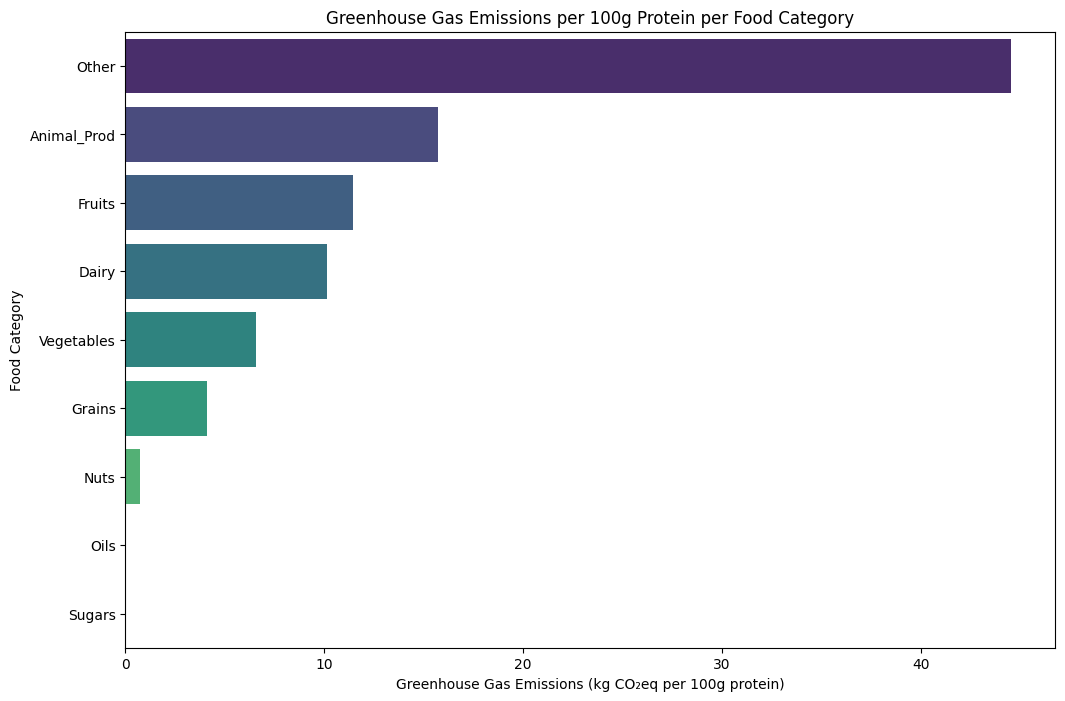

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for greenhouse gas emissions per 100g protein
correct_column_name = 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'

# Aggregate greenhouse gas emissions by category
category_ghg_emissions = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_ghg_emissions = category_ghg_emissions.sort_values(by=correct_column_name, ascending=False)

# Plot greenhouse gas emissions per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_ghg_emissions, x=correct_column_name, y='Category', palette='viridis')
plt.title('Greenhouse Gas Emissions per 100g Protein per Food Category')
plt.xlabel('Greenhouse Gas Emissions (kg CO₂eq per 100g protein)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/2056545918.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')


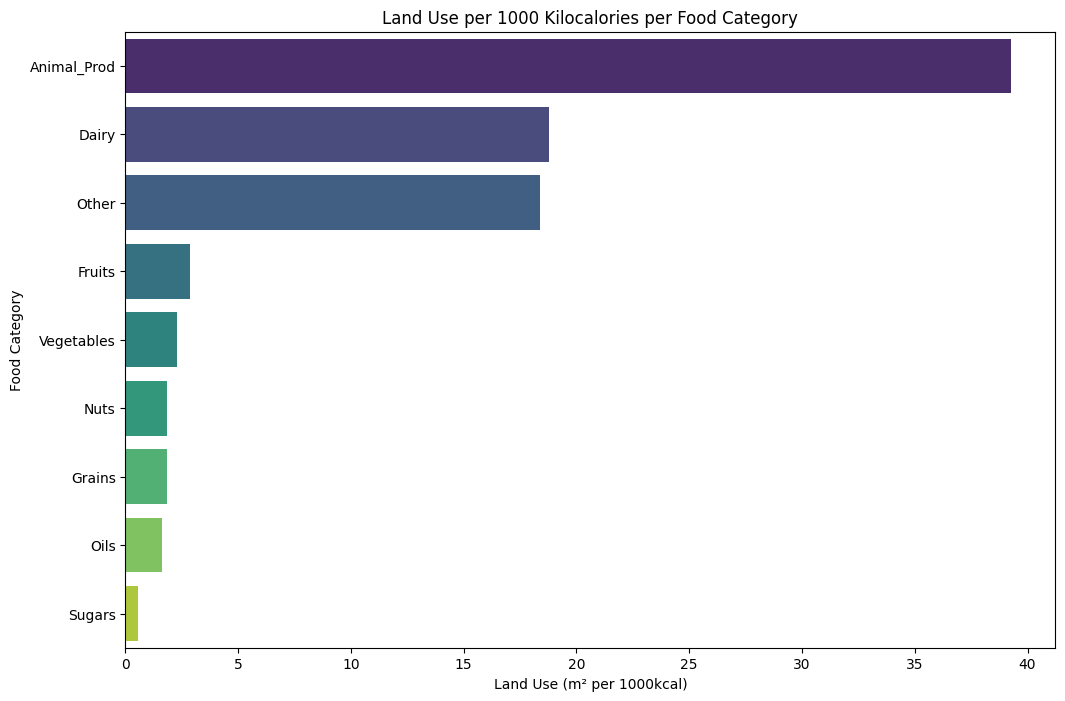

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for land use per 1000 kcal
correct_column_name = 'Land use per 1000kcal (m² per 1000kcal)'

# Aggregate land use by category
category_land_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_land_use = category_land_use.sort_values(by=correct_column_name, ascending=False)

# Plot land use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Land Use per 1000 Kilocalories per Food Category')
plt.xlabel('Land Use (m² per 1000kcal)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/1305307333.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')


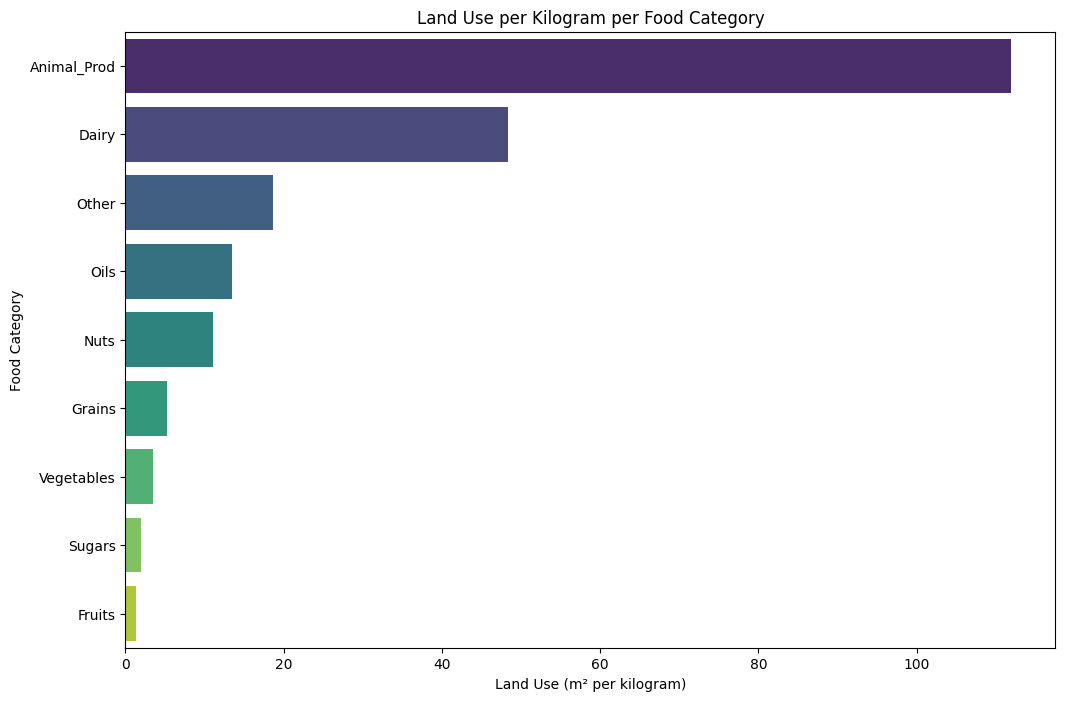

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for land use per kilogram
correct_column_name = 'Land use per kilogram (m² per kilogram)'

# Aggregate land use by category
category_land_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_land_use = category_land_use.sort_values(by=correct_column_name, ascending=False)

# Plot land use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Land Use per Kilogram per Food Category')
plt.xlabel('Land Use (m² per kilogram)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/1945551148.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')


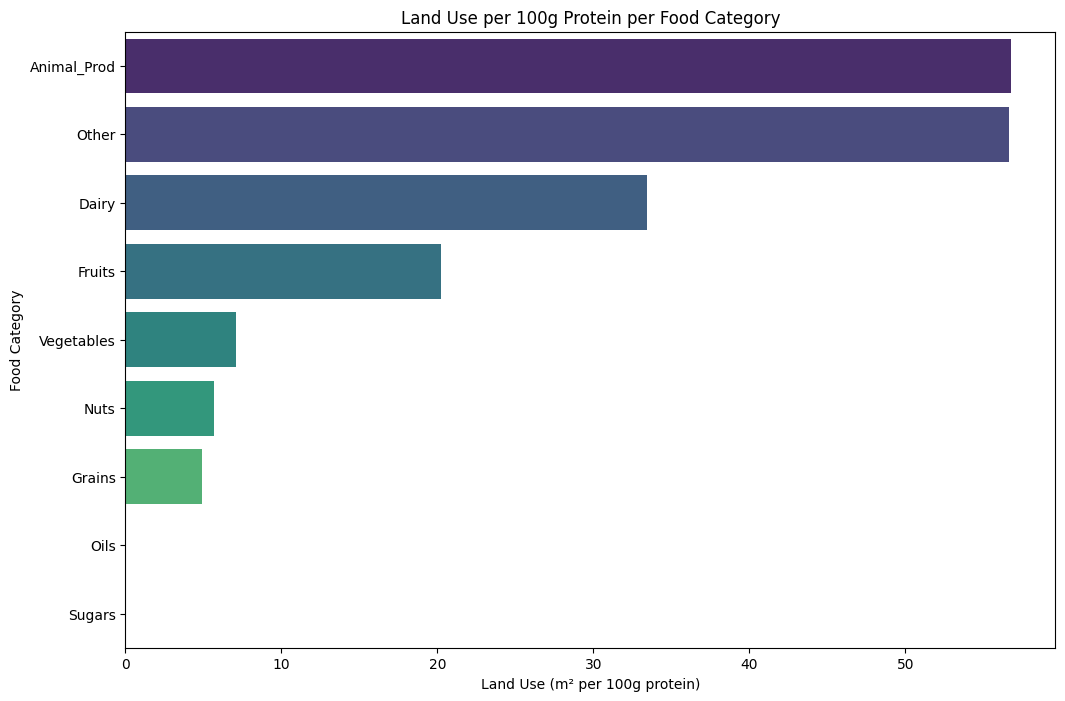

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for land use per 100g protein
correct_column_name = 'Land use per 100g protein (m² per 100g protein)'

# Aggregate land use by category
category_land_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_land_use = category_land_use.sort_values(by=correct_column_name, ascending=False)

# Plot land use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_land_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Land Use per 100g Protein per Food Category')
plt.xlabel('Land Use (m² per 100g protein)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/2121764877.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')


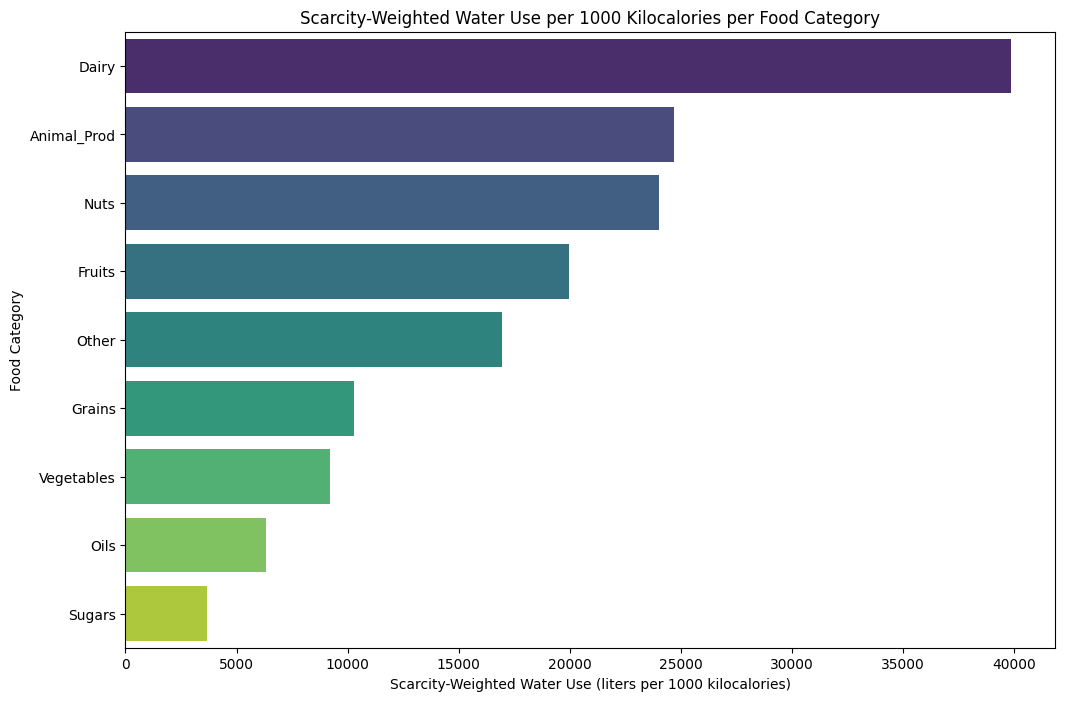

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for scarcity-weighted water use per 1000 kcal
correct_column_name = 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'

# Aggregate scarcity-weighted water use by category
category_scarcity_weighted_water_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_scarcity_weighted_water_use = category_scarcity_weighted_water_use.sort_values(by=correct_column_name, ascending=False)

# Plot scarcity-weighted water use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Scarcity-Weighted Water Use per 1000 Kilocalories per Food Category')
plt.xlabel('Scarcity-Weighted Water Use (liters per 1000 kilocalories)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/2901837341.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')


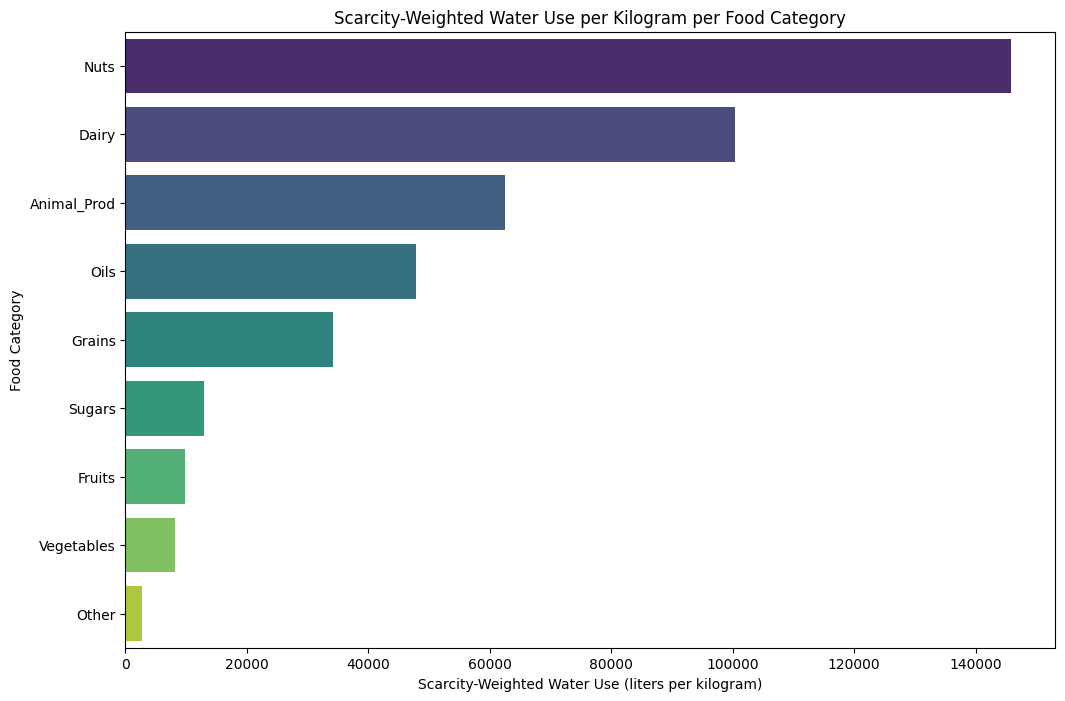

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for scarcity-weighted water use per kilogram
correct_column_name = 'Scarcity-weighted water use per kilogram (liters per kilogram)'

# Aggregate scarcity-weighted water use by category
category_scarcity_weighted_water_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_scarcity_weighted_water_use = category_scarcity_weighted_water_use.sort_values(by=correct_column_name, ascending=False)

# Plot scarcity-weighted water use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Scarcity-Weighted Water Use per Kilogram per Food Category')
plt.xlabel('Scarcity-Weighted Water Use (liters per kilogram)')
plt.ylabel('Food Category')
plt.show()


/tmp/ipykernel_227/3093851779.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')


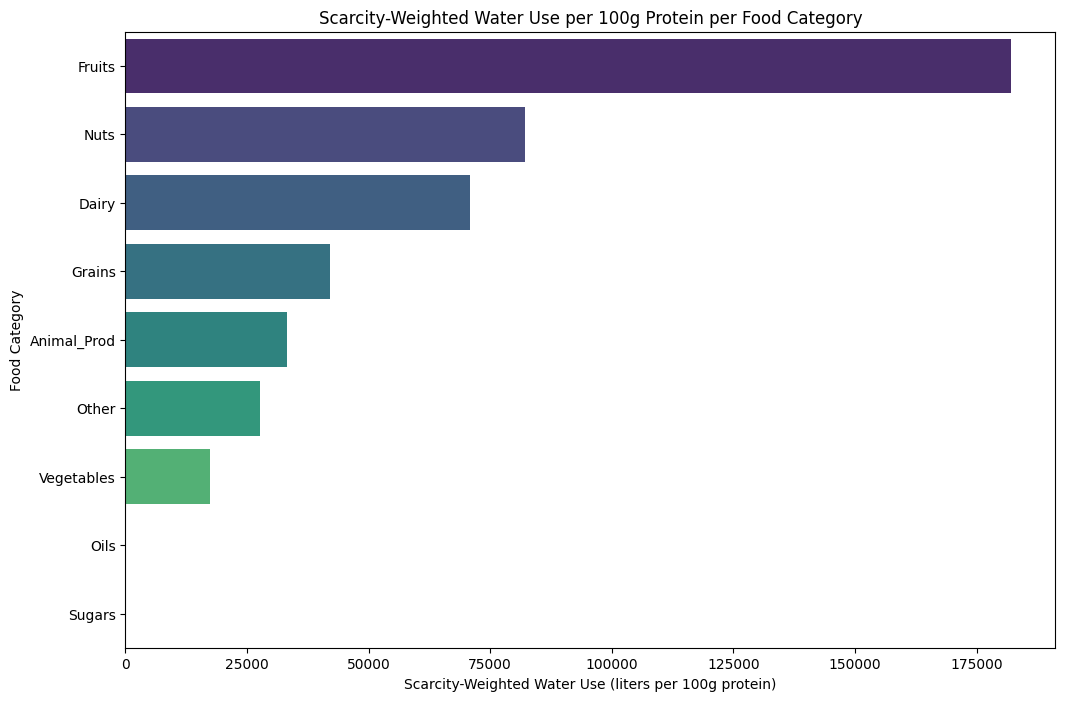

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column name for scarcity-weighted water use per 100g protein
correct_column_name = 'Scarcity-weighted water use per 100g protein (liters per 100g protein)'

# Aggregate scarcity-weighted water use by category
category_scarcity_weighted_water_use = food_production_data.groupby('Category')[correct_column_name].mean().reset_index()

# Sort values for better visualization
category_scarcity_weighted_water_use = category_scarcity_weighted_water_use.sort_values(by=correct_column_name, ascending=False)

# Plot scarcity-weighted water use per food category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_scarcity_weighted_water_use, x=correct_column_name, y='Category', palette='viridis')
plt.title('Scarcity-Weighted Water Use per 100g Protein per Food Category')
plt.xlabel('Scarcity-Weighted Water Use (liters per 100g protein)')
plt.ylabel('Food Category')
plt.show()


Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'EutrophyingEmissions_per_1000kcal', 'EutrophyingEmissions_per_kg',
       'EutrophyingEmissions_per_100g_protein',
       'FreshwaterWithdrawals_per_1000kcal',
       'FreshwaterWithdrawals_per_100g_protein',
       'FreshwaterWithdrawals_per_kg', 'GreenhouseGasEmissions_per_1000kcal',
       'GreenhouseGasEmissions_per_100g_protein', 'LandUse_per_1000kcal',
       'LandUse_per_kg', 'LandUse_per_100g_protein',
       'ScarcityWeightedWaterUse_per_kg',
       'ScarcityWeightedWaterUse_per_100g_protein',
       'ScarcityWeightedWaterUse_per_1000kcal', 'Category'],
      dtype='object')


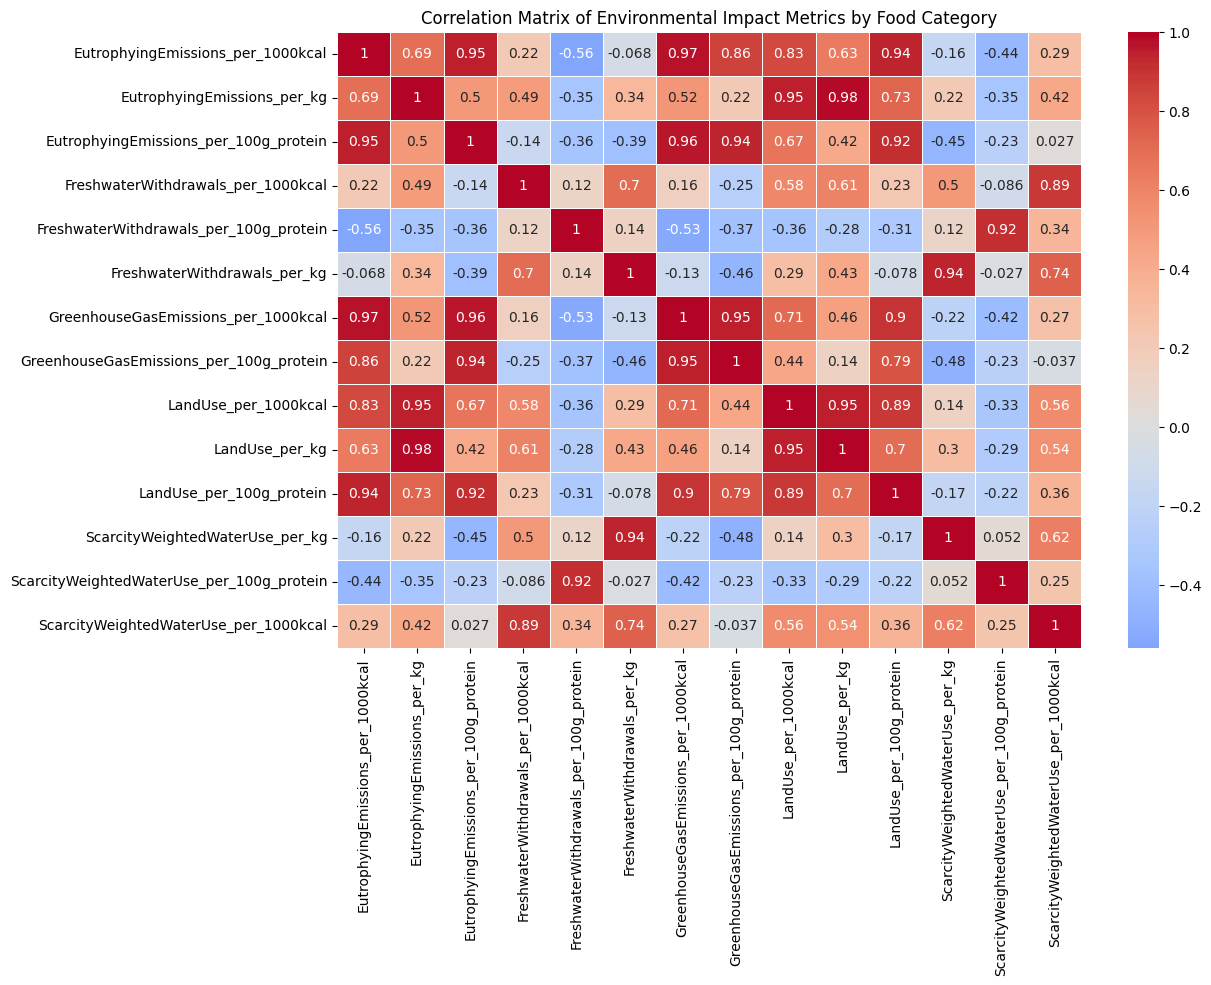

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#kaggle
# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column names for consistency
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_per_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_per_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_per_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_per_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_per_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_per_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_per_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_per_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_per_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_per_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_per_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_per_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_per_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_per_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_per_1000kcal",
    "EutrophyingEmissions_per_kg",
    "EutrophyingEmissions_per_100g_protein",
    "FreshwaterWithdrawals_per_1000kcal",
    "FreshwaterWithdrawals_per_100g_protein",
    "FreshwaterWithdrawals_per_kg",
    "GreenhouseGasEmissions_per_1000kcal",
    "GreenhouseGasEmissions_per_100g_protein",
    "LandUse_per_1000kcal",
    "LandUse_per_kg",
    "LandUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_kg",
    "ScarcityWeightedWaterUse_per_100g_protein",
    "ScarcityWeightedWaterUse_per_1000kcal"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Verify the column names after renaming
print(food_production_data.columns)

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Compute correlation matrix
correlation_matrix = category_data[cols_to_convert].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Environmental Impact Metrics by Food Category')
plt.show()


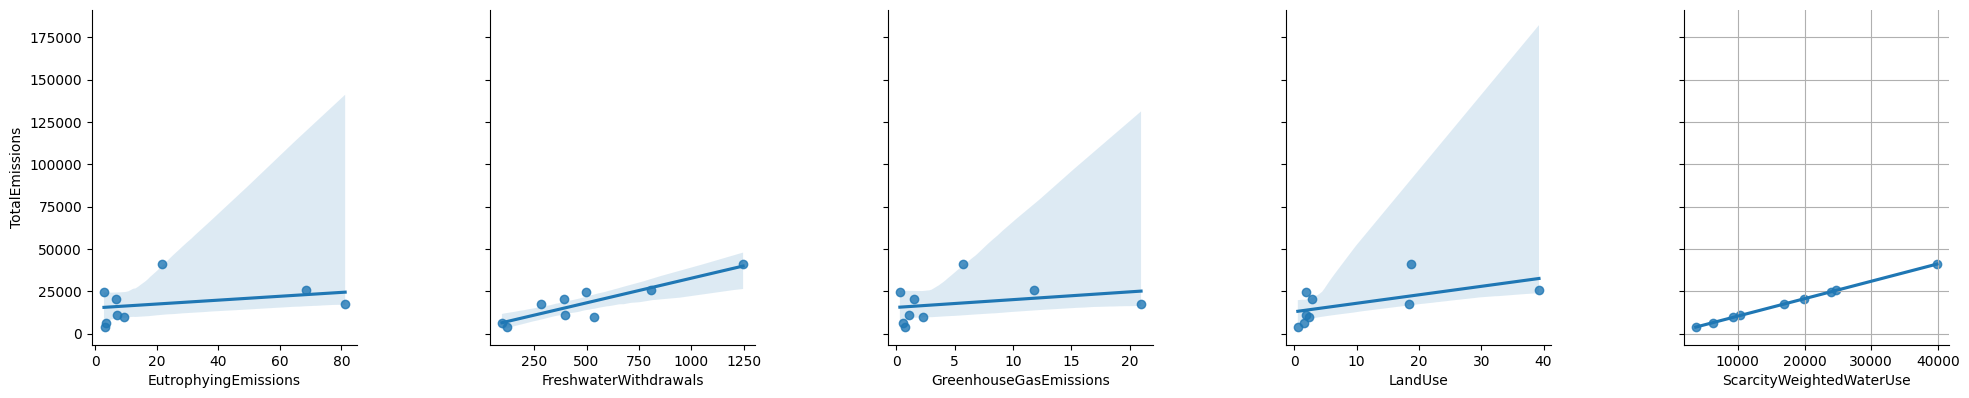

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#kaggle
# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column names for consistency
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_1000kcal",
    "EutrophyingEmissions_kg",
    "EutrophyingEmissions_100g_protein",
    "FreshwaterWithdrawals_1000kcal",
    "FreshwaterWithdrawals_100g_protein",
    "FreshwaterWithdrawals_kg",
    "GreenhouseGasEmissions_1000kcal",
    "GreenhouseGasEmissions_100g_protein",
    "LandUse_1000kcal",
    "LandUse_kg",
    "LandUse_100g_protein",
    "ScarcityWeightedWaterUse_kg",
    "ScarcityWeightedWaterUse_100g_protein",
    "ScarcityWeightedWaterUse_1000kcal"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Rename the columns to shorter names for the plot
category_data.rename(columns={
    "EutrophyingEmissions_1000kcal": "EutrophyingEmissions",
    "FreshwaterWithdrawals_1000kcal": "FreshwaterWithdrawals",
    "GreenhouseGasEmissions_1000kcal": "GreenhouseGasEmissions",
    "LandUse_1000kcal": "LandUse",
    "ScarcityWeightedWaterUse_1000kcal": "ScarcityWeightedWaterUse"
}, inplace=True)

# Define total emissions (simplified for demonstration)
category_data['TotalEmissions'] = category_data[
    ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
].sum(axis=1)

# Pairplot with regression lines
pairplot = sns.pairplot(category_data,
                        x_vars=["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"],
                        y_vars=["TotalEmissions"],
                        height=4,
                        aspect=1,
                        kind="reg")

pairplot.fig.subplots_adjust(wspace=0.5, hspace=0.1)
plt.grid(True)
plt.show()


In [ ]:
!pip install statsmodels==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 46.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
#kaggle
# Load data
food_production_data = pd.read_csv('Food_Production.csv')


# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column names for consistency
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_1000kcal",
    "EutrophyingEmissions_kg",
    "EutrophyingEmissions_100g_protein",
    "FreshwaterWithdrawals_1000kcal",
    "FreshwaterWithdrawals_100g_protein",
    "FreshwaterWithdrawals_kg",
    "GreenhouseGasEmissions_1000kcal",
    "GreenhouseGasEmissions_100g_protein",
    "LandUse_1000kcal",
    "LandUse_kg",
    "LandUse_100g_protein",
    "ScarcityWeightedWaterUse_kg",
    "ScarcityWeightedWaterUse_100g_protein",
    "ScarcityWeightedWaterUse_1000kcal"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Rename the columns to shorter names for the plot
category_data.rename(columns={
    "EutrophyingEmissions_1000kcal": "EutrophyingEmissions",
    "FreshwaterWithdrawals_1000kcal": "FreshwaterWithdrawals",
    "GreenhouseGasEmissions_1000kcal": "GreenhouseGasEmissions",
    "LandUse_1000kcal": "LandUse",
    "ScarcityWeightedWaterUse_1000kcal": "ScarcityWeightedWaterUse"
}, inplace=True)

# Define total emissions (simplified for demonstration)
category_data['TotalEmissions'] = category_data[
    ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
].sum(axis=1)

# Perform linear regression for each variable against Total Emissions
independent_vars = ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
results = {}

for var in independent_vars:
    X = category_data[var]
    y = category_data['TotalEmissions']
    X = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X).fit()  # Fit the model
    results[var] = model

# Print the summary of each regression model
for var, model in results.items():
    print(f"Regression Analysis for {var} vs. Total Emissions")
    print(model.summary())
    print("\n" + "="*80 + "\n")



Regression Analysis for EutrophyingEmissions vs. Total Emissions
                            OLS Regression Results                            
Dep. Variable:         TotalEmissions   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.6759
Date:                Fri, 28 Jun 2024   Prob (F-statistic):              0.438
Time:                        15:27:28   Log-Likelihood:                -96.139
No. Observations:                   9   AIC:                             196.3
Df Residuals:                       7   BIC:                             196.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

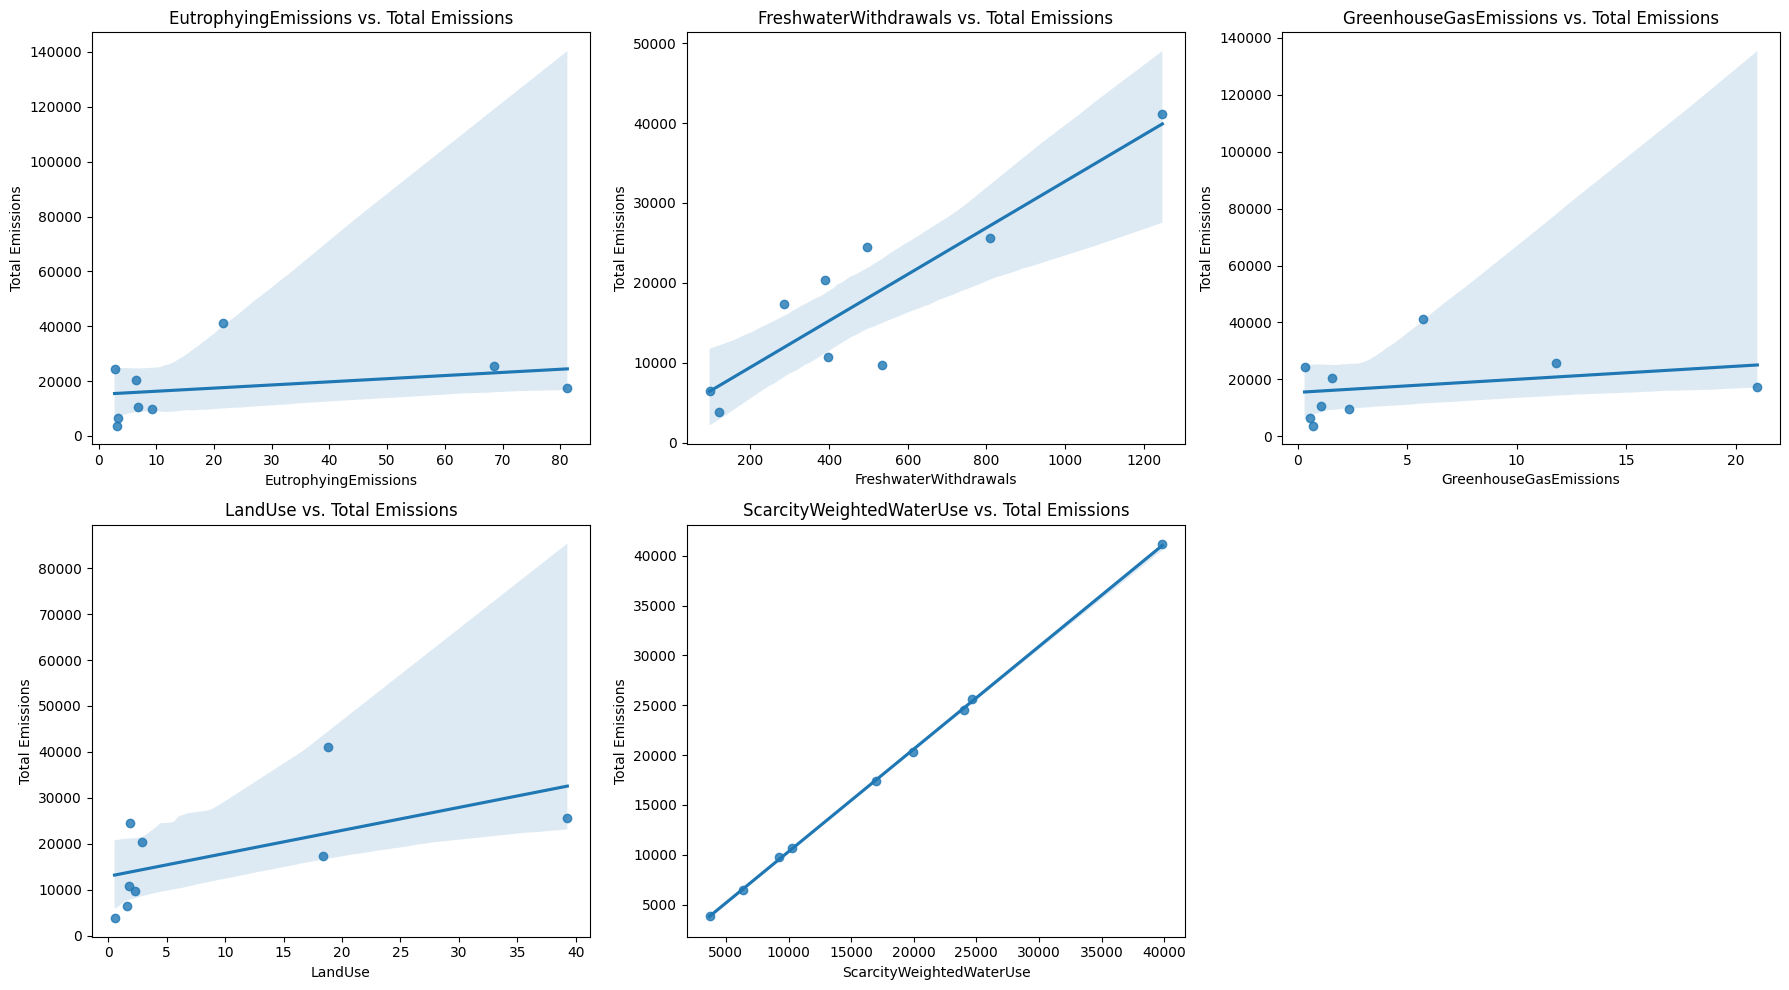

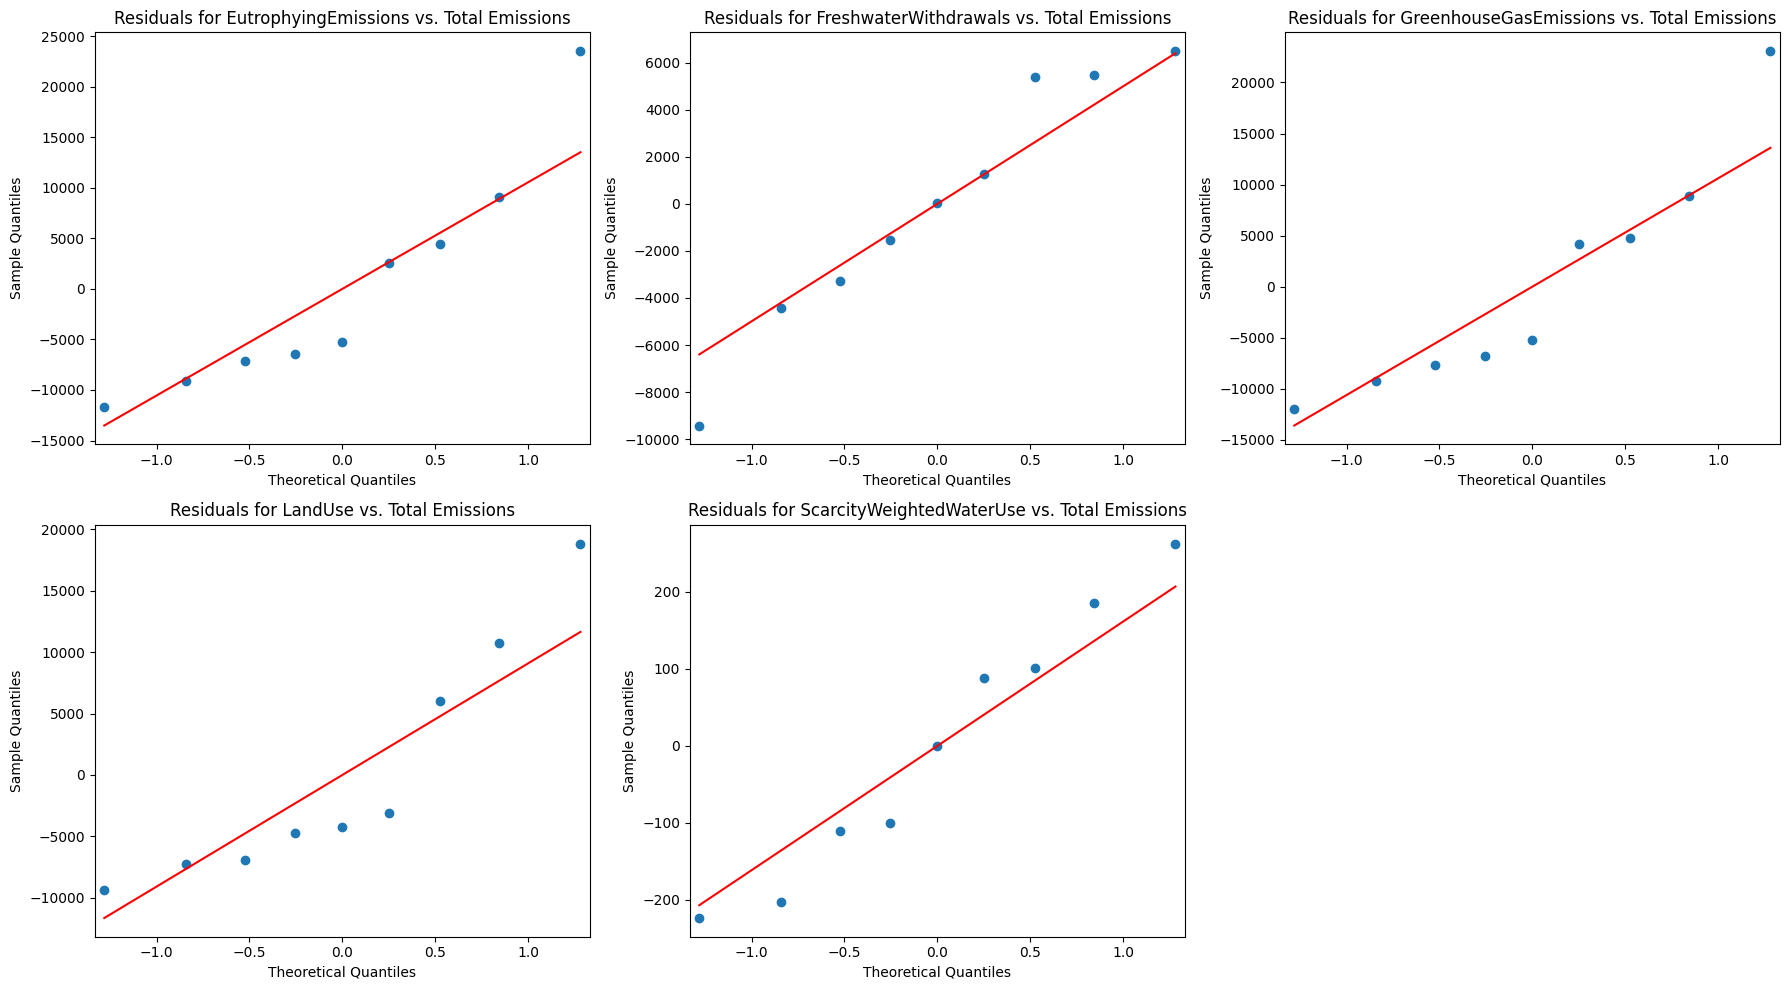

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#https://blog.csdn.net/iqdutao/article/details/109402570
#chatgpt

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column names for consistency
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_1000kcal",
    "EutrophyingEmissions_kg",
    "EutrophyingEmissions_100g_protein",
    "FreshwaterWithdrawals_1000kcal",
    "FreshwaterWithdrawals_100g_protein",
    "FreshwaterWithdrawals_kg",
    "GreenhouseGasEmissions_1000kcal",
    "GreenhouseGasEmissions_100g_protein",
    "LandUse_1000kcal",
    "LandUse_kg",
    "LandUse_100g_protein",
    "ScarcityWeightedWaterUse_kg",
    "ScarcityWeightedWaterUse_100g_protein",
    "ScarcityWeightedWaterUse_1000kcal"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Rename the columns to shorter names for the plot
category_data.rename(columns={
    "EutrophyingEmissions_1000kcal": "EutrophyingEmissions",
    "FreshwaterWithdrawals_1000kcal": "FreshwaterWithdrawals",
    "GreenhouseGasEmissions_1000kcal": "GreenhouseGasEmissions",
    "LandUse_1000kcal": "LandUse",
    "ScarcityWeightedWaterUse_1000kcal": "ScarcityWeightedWaterUse"
}, inplace=True)

# Define total emissions (simplified for demonstration)
category_data['TotalEmissions'] = category_data[
    ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
].sum(axis=1)

# Perform linear regression for each variable against Total Emissions
independent_vars = ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
results = {}

for var in independent_vars:
    X = category_data[var]
    y = category_data['TotalEmissions']
    X = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X).fit()  # Fit the model
    results[var] = model

# Plot regression results
plt.figure(figsize=(18, 10))
for i, var in enumerate(independent_vars):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=category_data[var], y=category_data['TotalEmissions'])
    plt.title(f'{var} vs. Total Emissions')
    plt.xlabel(var)
    plt.ylabel('Total Emissions')

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(18, 10))
for i, var in enumerate(independent_vars):
    plt.subplot(2, 3, i+1)
    sm.qqplot(results[var].resid, line='s', ax=plt.gca())
    plt.title(f'Residuals for {var} vs. Total Emissions')

plt.tight_layout()
plt.show()


Mean Squared Error: 154626552.55967405


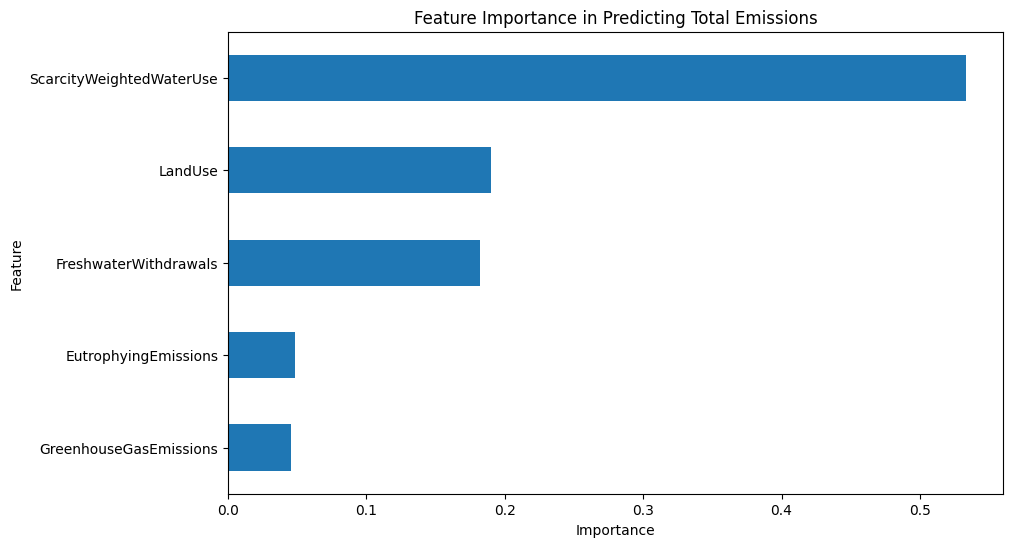

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column names for consistency
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_1000kcal",
    "EutrophyingEmissions_kg",
    "EutrophyingEmissions_100g_protein",
    "FreshwaterWithdrawals_1000kcal",
    "FreshwaterWithdrawals_100g_protein",
    "FreshwaterWithdrawals_kg",
    "GreenhouseGasEmissions_1000kcal",
    "GreenhouseGasEmissions_100g_protein",
    "LandUse_1000kcal",
    "LandUse_kg",
    "LandUse_100g_protein",
    "ScarcityWeightedWaterUse_kg",
    "ScarcityWeightedWaterUse_100g_protein",
    "ScarcityWeightedWaterUse_1000kcal"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Rename the columns to shorter names for the plot
category_data.rename(columns={
    "EutrophyingEmissions_1000kcal": "EutrophyingEmissions",
    "FreshwaterWithdrawals_1000kcal": "FreshwaterWithdrawals",
    "GreenhouseGasEmissions_1000kcal": "GreenhouseGasEmissions",
    "LandUse_1000kcal": "LandUse",
    "ScarcityWeightedWaterUse_1000kcal": "ScarcityWeightedWaterUse"
}, inplace=True)

# Define total emissions (simplified for demonstration)
category_data['TotalEmissions'] = category_data[
    ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
].sum(axis=1)

# Split the data into training and testing sets
X = category_data[["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]]
y = category_data["TotalEmissions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Determine feature importance
feature_importances = model.feature_importances_

# Visualize feature importance
features = X.columns
importances = pd.Series(feature_importances, index=features)

plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting Total Emissions')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Mean Squared Error: 154626552.55967405


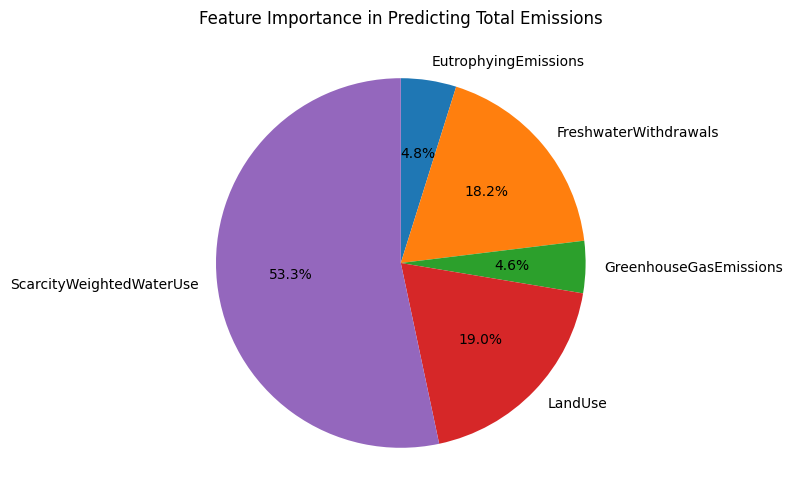

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
food_production_data = pd.read_csv('Food_Production.csv')

# Define food categories
food_categories = {
    'Grains': ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    'Nuts': ['Nuts', 'Groundnuts'],
    'Vegetables': ["Potatoes", "Cassava", 'Other Pulses', "Peas", 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Sugars': ['Cane Sugar', 'Beet Sugar'],
    'Oils': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Dairy': ['Milk', 'Cheese'],
    'Animal_Prod': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    'Other': ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Add a new column for food category
def categorize_food(product):
    for category, items in food_categories.items():
        if product in items:
            return category
    return 'Other'

food_production_data['Category'] = food_production_data['Food product'].apply(categorize_food)

# Correct column names for consistency
food_production_data.rename(columns={
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "EutrophyingEmissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "EutrophyingEmissions_100g_protein",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshwaterWithdrawals_1000kcal",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals_kg",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshwaterWithdrawals_100g_protein",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseGasEmissions_100g_protein",
    "Land use per 1000kcal (m² per 1000kcal)": "LandUse_1000kcal",
    "Land use per kilogram (m² per kilogram)": "LandUse_kg",
    "Land use per 100g protein (m² per 100g protein)": "LandUse_100g_protein",
    "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse_kg",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityWeightedWaterUse_100g_protein",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityWeightedWaterUse_1000kcal"
}, inplace=True)

# Convert relevant columns to numeric
cols_to_convert = [
    "EutrophyingEmissions_1000kcal",
    "EutrophyingEmissions_kg",
    "EutrophyingEmissions_100g_protein",
    "FreshwaterWithdrawals_1000kcal",
    "FreshwaterWithdrawals_100g_protein",
    "FreshwaterWithdrawals_kg",
    "GreenhouseGasEmissions_1000kcal",
    "GreenhouseGasEmissions_100g_protein",
    "LandUse_1000kcal",
    "LandUse_kg",
    "LandUse_100g_protein",
    "ScarcityWeightedWaterUse_kg",
    "ScarcityWeightedWaterUse_100g_protein",
    "ScarcityWeightedWaterUse_1000kcal"
]

for col in cols_to_convert:
    food_production_data[col] = pd.to_numeric(food_production_data[col], errors='coerce')

# Aggregate data by categories
category_data = food_production_data.groupby('Category')[cols_to_convert].mean().reset_index()

# Rename the columns to shorter names for the plot
category_data.rename(columns={
    "EutrophyingEmissions_1000kcal": "EutrophyingEmissions",
    "FreshwaterWithdrawals_1000kcal": "FreshwaterWithdrawals",
    "GreenhouseGasEmissions_1000kcal": "GreenhouseGasEmissions",
    "LandUse_1000kcal": "LandUse",
    "ScarcityWeightedWaterUse_1000kcal": "ScarcityWeightedWaterUse"
}, inplace=True)

# Define total emissions (simplified for demonstration)
category_data['TotalEmissions'] = category_data[
    ["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]
].sum(axis=1)

# Split the data into training and testing sets
X = category_data[["EutrophyingEmissions", "FreshwaterWithdrawals", "GreenhouseGasEmissions", "LandUse", "ScarcityWeightedWaterUse"]]
y = category_data["TotalEmissions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Determine feature importance
feature_importances = model.feature_importances_

# Visualize feature importance as a pie chart
features = X.columns
importances = pd.Series(feature_importances, index=features)

plt.figure(figsize=(10, 6))
importances.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Feature Importance in Predicting Total Emissions')
plt.ylabel('')
plt.show()
0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1addba0-7fdd-45b7-963a-cfc89fb50200' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>